# Data Methods for Health Research (DMHR) Assignment

## Important Note:
    1) To excute the code, first download data files from the following urls:
    * practice: uploaded to github
    * patient: 'https://files.digital.nhs.uk/71/B59D99/gp-reg-pat-prac-all.csv'
    * prescribing: 'https://files.digital.nhs.uk/38/03EC1C/T201804PDPI%20BNFT.CSV'
     
    * country_codes: 'https://www.who.int/healthinfo/statistics/country_codes.zip'
    * population: 'https://www.who.int/healthinfo/statistics/Pop.zip'
    * mortality: 'https://www.who.int/healthinfo/statistics/Morticd10_part1.zip'
               'https://www.who.int/healthinfo/statistics/Morticd10_part2.zip'
    2) Then, unzip the data files and save all the data files at the same directory as the Jupyter Notebook

In [3]:
#preliminaries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from math import floor

In [4]:
path = './'

# Assignment A - GP Practice Prescribing dataset

## Overview of Assignment A
1) Assignment A uses data of GP Practice Prescribing from NHS to analyse drug prescription and corresponding costs. The results can provide guideline for achieving “efficiency savings”in GP practices

2) There are mainly 3 files used in this session and are read into 3 DataFrames named 'practice', 'patient' and 'prescribing':

* practice: practice code, practice name and geographic information of GP practices, to select practices in a given geographic locality
* patient: practice code and muber of patients to find the number of patients of each practice
* prescribing: practice code to identify practice, bnf code and bnf name to identify drug, as well as actual cost and quantity which gives information of drug prescription.


3) Data preparation include reading in files, analysing missing values and outliers, as well as summarizing data. These process are conducted both at the beginning and later in in the assignment. Data prepareation enables reliable results based on quality dataset.

4) Data preparation include reading in files, analysing missing values and outliers, as well as summarizing data. These process are conducted both at the beginning and later in in the assignment. Data prepareation enables reliable results based on quality dataset.

## 0. Data preparation

### 0.1 Read in files to pandas dataframes

In [53]:
# 1. Read in the practice information data file to a pandas dataframe

# Create custom column names and read in the file using the column names as the header
filename=path + 'T201804ADDR+BNFT.CSV'
cols = ['timePeriod', 'practice_code', 'practice_name', 'practice_organization', 'street', 'city', 'area', 'postcode']
practice = pd.read_csv(filename, sep=',',header=None, names=cols,index_col=False).rename(columns=lambda x: x.strip())

# Explore the data using built-in methods
practice.head()

,timePeriod,practice_code,practice_name,practice_organization,street,city,area,postcode
0,201804,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 1HU
1,201804,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,201804,A81004,BLUEBELL MEDICAL CENTRE,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,,TS5 8SB
3,201804,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
4,201804,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MEDICAL PRACT,TENNANT STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 2AT


In [449]:
# 2. Read in the Number of Patients Registered data file to a pandas dataframe
filename_patient=path+'gp-reg-pat-prac-all.csv'
cols2 = ['publication', 'extract_date', 'type', 'ccg_code', 'ons_code', 'code', 'postcode', 'sex', 'age', 'number_of_patients']
patient = pd.read_csv(filename_patient, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())

patient.head()

,publication,extract_date,type,ccg_code,ons_code,code,postcode,sex,age,number_of_patients
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109


In [55]:
# 3. Read in the prescribing information data file to a pandas dataframe
filename=path + 'T201804PDPI+BNFT.CSV'
cols = ['sha', 'pct', 'practice', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost', 'quantity', 'period']
prescribing =  pd.read_csv(filename, header=None, names=cols, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())

prescribing.head()

,sha,pct,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804


### 0.2 Check out the missing values

In [283]:
# Replace null values with python-readable NaN, so that the count() method is applicable, the initial dataframe is not changed
patient_missing=patient.replace('^\s+$', np.nan, regex=True)
# count non-NA/null values of each object
patient_missing.count(), patient_missing.shape

(publication           7241
 extract_date          7241
 type                  7241
 ccg_code              7241
 ons_code              7241
 code                  7241
 postcode              7241
 sex                   7241
 age                   7241
 number_of_patients    7241
 dtype: int64, (7241, 10))

In [285]:
prescribing_missing=prescribing.replace('^\s+$', np.nan, regex=True)
prescribing_missing.count(), prescribing_missing.shape

(sha         9748354
 pct         9748354
 practice    9748354
 bnf_code    9748354
 bnf_name    9748354
 items       9748354
 nic         9748354
 act_cost    9748354
 quantity    9748354
 period      9748354
 dtype: int64, (9748354, 10))

In [286]:
practice_missing=practice.replace('^\s+$', np.nan, regex=True)
practice_missing.count(),practice_missing.shape

(timePeriod               9578
 practice_code            9578
 practice_name            9578
 practice_organization    9574
 street                   8890
 city                     9215
 area                     7660
 postcode                 9578
 dtype: int64, (9578, 8))

#### Missing value analysis:

* No missing value is observed in dataframes 'patient' and 'practice'. 
* Most missing values exist in columns 'street', 'city' and 'area' of dataframe 'practice'. Therefore, it is necessary to include variable 'postcode' for identifying GP practices in a given geographic locality.
* There is no missing value in  column 'code' of dataframe 'patient', column 'practice' of dataframe 'prescribing' or column 'practice_code' of dataframe 'practice', which all represent the unique identifier codes of GP practices. Therefore, the identifier code is a matching variable of high quality for linking these dataframes.

### 0.3 Check out the outliers

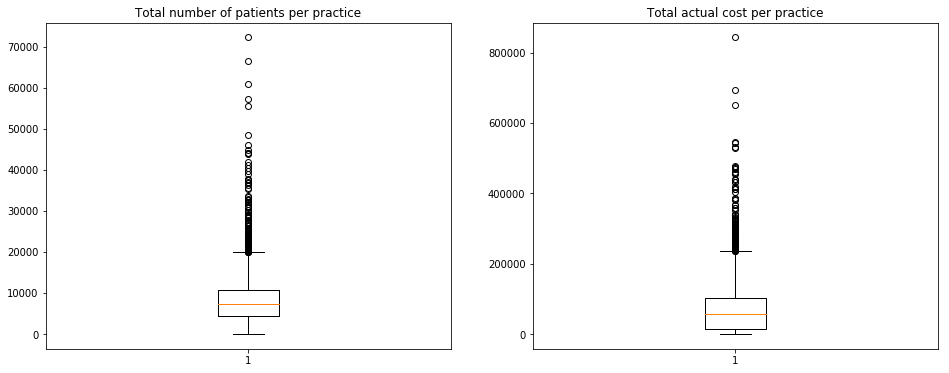

In [60]:
fig = plt.figure(figsize=(16,6))

# Plot a box plot of total number of patient per UK practice
fig1 = plt.subplot(121)
x1 = patient.number_of_patients.values
plt.boxplot(x1)
plt.title('Total number of patients per practice')

# Calculate total actual cost per UK Practice
act_cost_UK = pd.DataFrame(prescribing.groupby(prescribing.practice).apply(lambda subf: subf['act_cost'].sum()))
act_cost_UK.columns=['total_actual_cost']
# Reseting the index
act_cost_UK.reset_index(inplace=True)

# plot a box plot of total number of patients per UK practice
fig2 = plt.subplot(122)
x2 = act_cost_UK.total_actual_cost.values
plt.boxplot(x2)
plt.title('Total actual cost per practice')

plt.show()
plt.close()

#### Outlier detection and manipulation:
* It can be observed from the boxplots that there exist extremely huge numbers. However, they are not necessarilly outliers. For example, the practice Nexus Health Group, which has 72,227 registered patients in this dataset, is reported to serve 60,000 patients in 1st August 2016. So they are reasonably large and are not excluding for Question 1 to 3 for counting the total values.
* In question 4, while calculating relative costs per patient, extreme values would largely effect the mean values. Therefore, the outliers should be excluded from the dataset, which will be explained in part 4 in detail.
    

### 0.4 Summarize data

In [72]:
summarize=[practice['practice_code'].count(), prescribing['quantity'].sum(),patient['number_of_patients'].mean(), patient['number_of_patients'].std()]
summarize

[9578, 6955996497, 8153.514017400911, 5184.888435306803]

#### Data summary:
* There are in total 9,578 recorded practices, and 6,955,996,497 recorded prescriptions. There are on average 8,154 patients per practice. The standard deviation is 5185 which indicates high level of variation.

## 1. Identify all GP practices located in London. For those practices, describe:
* the total number of patients registered
* the total number of prescriptions
* the total actual cost of these prescriptions (using the ACT COST column)
* the top 10 most frequent drugs prescribed
* the bottom 10 less frequent drugs prescribed

#### Identigy all GP practices located in London
The selection rule is: include the practice if the name of its area contains 'LONDON' or its postcode starts with 'E', 'EC', 'N', 'NW', 'SE', 'SW', 'W' or 'WC'

* As is explained in part 0.1, it is reasonalbe to use columns 'area' and 'postcode' to select GP practices located in London.
* The name of area should include 'LONDON' but not necessarilly be 'LONDON', because it can be validated that areas such as 'FINCHLEY LONDON' also belong to london.
* The practice should meet at least one criterion but not necessarilly both, because there are many missing values in column 'area'

In [64]:
# Identify all GP practices located in London.
selected_area='LONDON'
postcode_regex='E\d|EC\d|N\d|NW\d|SE\d|SW\d|W\d|WC\d'
# Select practices whose areas contain 'LONDON' or postcodes belong to City of London
practice_london=practice[practice.area.str.match('[^\d]*'+selected_area)|practice.postcode.str.match(postcode_regex)]
practice_london.head()

,timePeriod,practice_code,practice_name,practice_organization,street,city,area,postcode
1873,201804,E83003,OAKLEIGH ROAD HEALTH CENTRE,OAKLEIGH ROAD HEALTH CTR,280 OAKLEIGH ROAD NORTH,WHETSTONE,LONDON,N20 0DH
1874,201804,E83005,LICHFIELD GROVE SURGERY,64 LICHFIELD GROVE,,FINCHLEY,LONDON,N3 2JP
1875,201804,E83006,GREENFIELD MEDICAL CENTRE,GREENFIELD MEDICAL CENTRE,143-145 CRICKLEWOOD LANE,CRICKLEWOOD,LONDON,NW2 1HS
1876,201804,E83007,SQUIRES LANE MEDICAL PRACTICE,2 SQUIRES LANE,,FINCHLEY,LONDON,N3 2AU
1877,201804,E83008,HEATHFIELDE MEDICAL CENTRE,HEATHFIELDE MEDICAL CTR,LYTTLETON ROAD FINCHLEY,BARNET,LONDON,N2 0EQ


### For those practices, desctibe:

### 1.1 The total number of patients registered

In [450]:
# Link dataframe 'patient' and 'practice_london' matching by practice code to identify number of patients registered at each London practice
patient_london = pd.merge(practice_london, patient[['code', 'number_of_patients']], left_on='practice_code' , right_on='code')
patient_london.head()

,timePeriod,practice_code,practice_name,practice_organization,street,city,area,postcode,code,number_of_patients
0,201804,E83003,OAKLEIGH ROAD HEALTH CENTRE,OAKLEIGH ROAD HEALTH CTR,280 OAKLEIGH ROAD NORTH,WHETSTONE,LONDON,N20 0DH,E83003,8911
1,201804,E83005,LICHFIELD GROVE SURGERY,64 LICHFIELD GROVE,,FINCHLEY,LONDON,N3 2JP,E83005,6224
2,201804,E83006,GREENFIELD MEDICAL CENTRE,GREENFIELD MEDICAL CENTRE,143-145 CRICKLEWOOD LANE,CRICKLEWOOD,LONDON,NW2 1HS,E83006,6885
3,201804,E83007,SQUIRES LANE MEDICAL PRACTICE,2 SQUIRES LANE,,FINCHLEY,LONDON,N3 2AU,E83007,5706
4,201804,E83008,HEATHFIELDE MEDICAL CENTRE,HEATHFIELDE MEDICAL CTR,LYTTLETON ROAD FINCHLEY,BARNET,LONDON,N2 0EQ,E83008,7900


In [451]:
# Calculate the total number of patients for all London practices
total_number_of_patients_london = sum(patient_london.number_of_patients)
total_number_of_patients_london

6026298L

* Q1.1 The total number of patients registered at all GP practices located in London is 6,026,298.

### 1.2 The total number of prescriptions

Note: According to documentation, bnf_code/bnf_name is unique (no duplicated rows) for each drug and practice, and all prescriptions of each drug is recorded in one row. So we should sum up the values of column 'quantity' rather than count the number of rows to calculate the total number of prescriptions.

In [70]:
# Link dataframe 'prescribing' and 'practice_london' matching by practice code to select prescribing data for London practices
prescribing_london=pd.merge(prescribing[['practice', 'bnf_code', 'bnf_name', 'act_cost', 'quantity']],practice_london[['practice_code', 'practice_name']],left_on='practice',right_on='practice_code')#.copy(deep=True)
prescribing_london.head()

,practice,bnf_code,bnf_name,act_cost,quantity,practice_code,practice_name
0,Y04681,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,4.48,15,Y04681,WATFORD CARE ALLIANCE
1,Y04681,0106040M0BBAAAA,Movicol_Pdr Sach 13.8g (Lem & Lim),5.13,20,Y04681,WATFORD CARE ALLIANCE
2,Y04681,0106040M0BBAJAB,Movicol_Paed Pdr Sach 6.9g (Choc),4.07,30,Y04681,WATFORD CARE ALLIANCE
3,Y04681,0106040N0AAABAB,Phos Enem_(For B) 128ml Stnd Tube,36.92,10,Y04681,WATFORD CARE ALLIANCE
4,Y04681,0106040R0BBAAAF,Micralax_Micro-Enem 5ml,3.88,10,Y04681,WATFORD CARE ALLIANCE


In [73]:
# Calculate the total number of prescriptions for all London practices
total_number_of_prescriptions_london=prescribing_london.quantity.sum()
total_number_of_prescriptions_london

526975959

* Q1.2 The total number of prescriptions across all GP practices located in London is 526,975,959

### 1.3 The total actual cost of these prescriptions

In [75]:
# Calculate the total actual cost of prescriptions for all London practices
total_act_cost_london=sum(prescribing_london.act_cost)
total_act_cost_london

44914570.21000154

* Q1.3 The total actual cost of prescriptions across all GP practices located in London is 44,914,570

### 1.4 The top 10 most frequent drugs prescribed

In [83]:
# Sum up total quantity prescribed per drug grouping by bnf_name which is unique for each drug and practice according to documentation
quantity_london=pd.DataFrame(prescribing_london.groupby(prescribing_london.bnf_name).apply(lambda subf: subf['quantity'].sum()))

# Rename the column
quantity_london.columns=['total_quantity_prescribed_per_drug']
# Reset the index
quantity_london.reset_index(inplace=True)

# Sort the data according to the total quantity prescribed
quantity_london_sorted=quantity_london.sort_values('total_quantity_prescribed_per_drug', axis=0, ascending=False, kind='quicksort', na_position='last')
# Select the top 10 most frequent drugs prescribed
top_10_london=quantity_london_sorted.head(10)
# Reset the index
top_10_london=top_10_london.reset_index(drop=True)

# The top 10 most frequent drugs prescribed
top_10_london

,bnf_name,total_quantity_prescribed_per_drug
0,Ensure Plus_Milkshake Style Liq (9 Flav),17618168
1,Metformin HCl_Tab 500mg,12067995
2,Fortisip Bottle_Liq (8 Flav),10435984
3,Lactulose_Soln 3.1g-3.7g/5ml,9573152
4,Paracet_Tab 500mg,7953529
5,Dermol 500_Lot,6926000
6,Ensure Compact_Liq (4 Flav),6887822
7,Fresubin 2kcal_Drink (6 Flav),6723152
8,Fortisip Compact_Liq (8 Flav),5610000
9,Omeprazole_Cap E/C 20mg,4834655


* Q1.4 The top 10 most frequent drugs prescribed across all GP practices located in London:


|Rank|Drug|Total quantity prescribed|
|--|--|--|
|1|Ensure Plus_Milkshake Style Liq (9 Flav)|17618168 	|
|2|Metformin HCl_Tab 500mg|12067995|
|3|Fortisip Bottle_Liq (8 Flav)|10435984|
|4|Lactulose_Soln 3.1g-3.7g/5ml|9573152|
|5|Paracet_Tab 500mg|7953529|
|6|Dermol 500_Lot|6926000|
|7|Ensure Compact_Liq (4 Flav)|6887822|
|8|Fresubin 2kcal_Drink (6 Flav)|6723152|
|9|Fortisip Compact_Liq (8 Flav)|5610000|
|10|Omeprazole_Cap E/C 20mg|4834655|

### 1.5 The bottom 10 less frequent drugs prescribed

In [114]:
# The bottom 10 most frequent drugs prescribed
bottom_10_london=quantity_london_sorted.tail(10)
# Reset the index
bottom_10_london = bottom_10_london.reset_index(drop=True)

# the bottom 10 less frequent drugs prescribed
bottom_10_london

,bnf_name,total_quantity_prescribed_per_drug
0,Tritace_Titration Pack (Tab 2.5/5/10mg),1
1,Botulinum A Toxin_Inj Pdr 50u Vl,1
2,Botulinum A Toxin_Inj Pdr 200u Vl,1
3,Botulinum A Toxin_Inj Pdr 100u Vl,1
4,Hypafix gentle touch 10cm x 2m Surg Adh,1
5,Bonviva_Inj 3mg/3ml Pfs,1
6,Blumont Hypromellose 0.3% Eye Dps 10ml,1
7,Blue Dot Retention S/Cloth SurgTape 10cm,1
8,Mediven harmony Class 1 A/Sleeve + Shoul,1
9,Methotrexate_Inj 7.5mg/0.3ml Pfs,0


It can be observed that the total quantity of more than 10 drugs are equally small. To identify the least frequent drugs prescribed:

In [116]:
# Select the drugs, whose total number of prescription is 0 or 1
bottom_10_london_update = quantity_london_sorted[quantity_london_sorted.total_quantity_prescribed_per_drug<=1]
# Reset the index
bottom_10_london_update = bottom_10_london_update.reset_index(drop=True)

# The least frequent drugs prescribed
bottom_10_london_update.tail(10)

,bnf_name,total_quantity_prescribed_per_drug
238,Tritace_Titration Pack (Tab 2.5/5/10mg),1
239,Botulinum A Toxin_Inj Pdr 50u Vl,1
240,Botulinum A Toxin_Inj Pdr 200u Vl,1
241,Botulinum A Toxin_Inj Pdr 100u Vl,1
242,Hypafix gentle touch 10cm x 2m Surg Adh,1
243,Bonviva_Inj 3mg/3ml Pfs,1
244,Blumont Hypromellose 0.3% Eye Dps 10ml,1
245,Blue Dot Retention S/Cloth SurgTape 10cm,1
246,Mediven harmony Class 1 A/Sleeve + Shoul,1
247,Methotrexate_Inj 7.5mg/0.3ml Pfs,0


In [146]:
# Count the number of drugs
bottom_10_london_update.bnf_name.count()

248

* Q1.5 In this dataset, the least frequent drug prescribed is Methotrexate_Inj 7.5mg/0.3ml Pfs. There are 247 drugs which are prescribed only once.

### Discussion

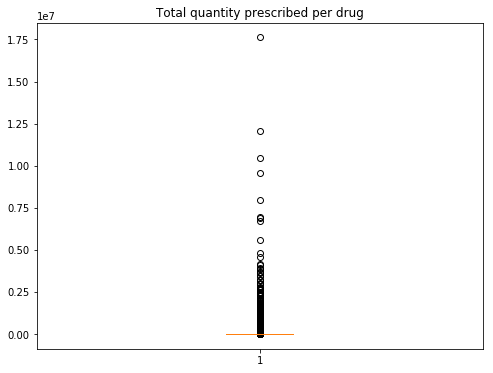

In [122]:
# Plot a box plot of total quantity prescribed per drug to detect possible outliers
fig = plt.figure(figsize=(8,6))

x = quantity_london_sorted.total_quantity_prescribed_per_drug.values
plt.boxplot(x)
plt.title('Total quantity prescribed per drug')

plt.show()
plt.close()

In [125]:
# Check if the quantity of Ensure Plus_Milkshake Style Liq (9 Flav) prescribed is unreasonably large
top_frequent = prescribing_london[prescribing_london.bnf_name=='Ensure Plus_Milkshake Style Liq (9 Flav)']
top_frequent.head()

,practice,bnf_code,bnf_name,act_cost,quantity,practice_code,practice_name
2174,E83003,090402000BBRRA0,Ensure Plus_Milkshake Style Liq (9 Flav),399.35,76800,E83003,OAKLEIGH ROAD HEALTH CENTRE
3470,E83005,090402000BBRRA0,Ensure Plus_Milkshake Style Liq (9 Flav),280.34,42000,E83005,LICHFIELD GROVE SURGERY
5761,E83007,090402000BBRRA0,Ensure Plus_Milkshake Style Liq (9 Flav),204.68,39400,E83007,SQUIRES LANE MEDICAL PRACTICE
6971,E83008,090402000BBRRA0,Ensure Plus_Milkshake Style Liq (9 Flav),215.48,35200,E83008,HEATHFIELDE MEDICAL CENTRE
8368,E83009,090402000BBRRA0,Ensure Plus_Milkshake Style Liq (9 Flav),704.66,135600,E83009,PHGH DOCTORS


The box plot indicate possible outliers which are extremely large. However, it can be observed that the quantity of the top frequent drug prescribed is generally large. So the results of Question 1.4 and 1.5 are reasonable. 

## 2. Repeat the previous instructions, this time for the city of Cambridge. Discuss andcompare your findings with the answers for London in question 1 above using descriptive statistics.

#### Identigy all GP practices located in city of Cambridge
The selection rule is: include the practice if the name of its city is 'Cambridge'.

* The postcode of city of Cambridge starts with 'CB'. However it also refers to other area outside city of Cambridge. Therefore, the column 'postcode' is not used to select GP practices located in city of Cambridge.
* The column 'city' is used instead of 'area' and the name of city should be 'Cambridge', so that the subset refer to the city of Cambridge rather than a larger area of Cambridgeshire.

In [131]:
# Identify all GP practices located in City of Cambridge.
selected_city='CAMBRIDGE'
# Select practices whose city is 'CAMBRIDGE', '\s*' is used to eliminate the effect of spaces
practice_cambridge=practice[(practice.city.str.match('\s*'+selected_city))]
practice_cambridge.head()

,timePeriod,practice_code,practice_name,practice_organization,street,city,area,postcode
1455,201804,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH
1456,201804,D81002,HUNTINGDON ROAD SURGERY,HUNTINGDON ROAD SURGERY,1 HUNTINGDON ROAD,CAMBRIDGE,,CB3 0DB
1457,201804,D81003,YORK STREET MEDICAL PRACTICE,YORK STREET MED PRACT.,146-148 YORK STREET,CAMBRIDGE,CAMBRIDGESHIRE,CB1 2PY
1459,201804,D81005,NEWNHAM WALK SURGERY,NEWNHAM WALK SURGERY,WORDSWORTH GROVE,CAMBRIDGE,CAMBRIDGESHIRE,CB3 9HS
1462,201804,D81009,SHELFORD MEDICAL PRACTICE,SHELFORD MEDICAL PRACTICE,ASHEN GREEN GRT SHELFORD,CAMBRIDGE,CAMBRIDGESHIRE,CB22 5FY


### For those practices, desctibe:

### 2.1 The total number of patients registered

In [452]:
# Link dataframe 'patient' and 'practice_cambridge' matching by practice code to identify number of patients registered at each Cambridge practice
patient_cambridge = pd.merge(practice_cambridge, patient[['code', 'number_of_patients']], left_on='practice_code' , right_on='code')
patient_cambridge.head()

,timePeriod,practice_code,practice_name,practice_organization,street,city,area,postcode,code,number_of_patients
0,201804,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH,D81001,12057
1,201804,D81002,HUNTINGDON ROAD SURGERY,HUNTINGDON ROAD SURGERY,1 HUNTINGDON ROAD,CAMBRIDGE,,CB3 0DB,D81002,16939
2,201804,D81003,YORK STREET MEDICAL PRACTICE,YORK STREET MED PRACT.,146-148 YORK STREET,CAMBRIDGE,CAMBRIDGESHIRE,CB1 2PY,D81003,9927
3,201804,D81005,NEWNHAM WALK SURGERY,NEWNHAM WALK SURGERY,WORDSWORTH GROVE,CAMBRIDGE,CAMBRIDGESHIRE,CB3 9HS,D81005,14941
4,201804,D81009,SHELFORD MEDICAL PRACTICE,SHELFORD MEDICAL PRACTICE,ASHEN GREEN GRT SHELFORD,CAMBRIDGE,CAMBRIDGESHIRE,CB22 5FY,D81009,9071


In [458]:
# Calculate the total number of patients for all Cambridge practices
total_number_of_patients_cambridge = sum(patient_cambridge.number_of_patients)
total_number_of_patients_cambridge

300885L

* Q2.1 The total number of patients registered at all GP practices located in city of Cambridge is 300,885.

### 2.2 The total number of prescriptions

In [135]:
# Link dataframe 'prescribing' and 'practice_cambridge' matching by practice code to select prescribing data for Cambridge practices
prescribing_cambridge=pd.merge(prescribing[['practice', 'bnf_code', 'bnf_name', 'act_cost', 'quantity']],practice_cambridge[['practice_code', 'practice_name']],left_on='practice',right_on='practice_code')#.copy(deep=True)
prescribing_cambridge.head()

,practice,bnf_code,bnf_name,act_cost,quantity,practice_code,practice_name
0,D81001,0101021B0AAAHAH,Alginate_Raft-Forming Oral Susp S/F,11.29,2300,D81001,LENSFIELD MEDICAL PRACTICE
1,D81001,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,13.91,1450,D81001,LENSFIELD MEDICAL PRACTICE
2,D81001,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,11.10,1000,D81001,LENSFIELD MEDICAL PRACTICE
3,D81001,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,8.96,30,D81001,LENSFIELD MEDICAL PRACTICE
4,D81001,0101021B0BEAUA0,Gaviscon P/Mint_Tab Chble,27.57,336,D81001,LENSFIELD MEDICAL PRACTICE


In [150]:
# Calculate the total number of prescriptions for all Cambridge practices
total_number_of_prescriptions_cambridge=prescribing_cambridge.quantity.sum()
total_number_of_prescriptions_cambridge

24332260

* Q2.2 The total number of prescriptions across all GP practices located in city of Cambridge is 24,332,260

### 2.3 The total actual cost of these prescriptions

In [141]:
# Calculate the total actual cost of prescriptions for all Cambridge practices
total_act_cost_cambridge=sum(prescribing_cambridge.act_cost)
total_act_cost_cambridge

2344091.249999998

* Q2.3 The total actual cost of prescriptions across all GP practices located in city of Cambridge is 2,344,091

### 2.4 The top 10 most frequent drugs prescribed

In [142]:
# Sum up total quantity prescribed per drug grouping by bnf_name
quantity_cambridge=pd.DataFrame(prescribing_cambridge.groupby(prescribing_cambridge.bnf_name).apply(lambda subf: subf['quantity'].sum()))

# Rename the column
quantity_cambridge.columns=['total_quantity_prescribed_per_drug']
# Reset the index
quantity_cambridge.reset_index(inplace=True)

# Sort the data according to the total quantity prescribed
quantity_cambridge_sorted=quantity_cambridge.sort_values('total_quantity_prescribed_per_drug', axis=0, ascending=False, kind='quicksort', na_position='last')
# Select the top 10 most frequent drugs prescribed
top_10_cambridge=quantity_cambridge_sorted.head(10)
# Reset the index
top_10_cambridge=top_10_cambridge.reset_index(drop=True)

# The top 10 most frequent drugs prescribed
top_10_cambridge

,bnf_name,total_quantity_prescribed_per_drug
0,Fortisip Compact_Liq (8 Flav),910125
1,Nutrison Pack_Energy,651324
2,Paracet_Tab 500mg,545299
3,Fortisip Bottle_Liq (8 Flav),482936
4,Dermol 500_Lot,432000
5,Omeprazole_Cap E/C 20mg,429367
6,Nutrison Pack_Energy M/Fibre,409716
7,Lactulose_Soln 3.1g-3.7g/5ml,405920
8,Metformin HCl_Tab 500mg,303405
9,Fortijuce_Liq (7 Flav),280600


* Q2.4 The top 10 most frequent drugs prescribed across all GP practices located in city of Cambridge:

|Rank|Drug|Total quantity prescribed|
|--|--|--|
|1|Fortisip Compact_Liq (8 Flav)|910125|
|2|Nutrison Pack_Energy|651324|
|3|Paracet_Tab 500mg|545299|
|4|Fortisip Bottle_Liq (8 Flav)|482936|
|5|Dermol 500_Lot|432000|
|6|Omeprazole_Cap E/C 20mg 	|429367|
|7|Nutrison Pack_Energy M/Fibre|409716|
|8|Lactulose_Soln 3.1g-3.7g/5ml|405920|
|9|Metformin HCl_Tab 500mg|303405|
|10|Fortijuce_Liq (7 Flav)|280600|

### 2.5 the bottom 10 less frequent drugs prescribed

In [144]:
# The bottom 10 most frequent drugs prescribed
bottom_10_cambridge=quantity_cambridge_sorted.tail(10)
# Reset the index
bottom_10_cambridge = bottom_10_cambridge.reset_index(drop=True)

# the bottom 10 less frequent drugs prescribed
bottom_10_cambridge

,bnf_name,total_quantity_prescribed_per_drug
0,Gardasil 9_Vac 0.5ml Pfs,1
1,Optiflo G Cath Maint Soln 100ml,1
2,Acti-Fast 2-Way Stch 7.5cmx1m (Blue) Stk,1
3,Coloplast_Brava Skin Barrier Crm 60ml,1
4,Limb Seal-Tight Adult Foot/Ankle Wound C,1
5,Hydrocort/Lido HCl_Spy 0.2%/1% 30ml,1
6,Opus_DeoGel Deodorising & Lubricating Ge,1
7,Coloplast_Brava Belt (For Sensura Mio) S,1
8,Loceryl Curanail_Medic Nail Lacquer 3ml,1
9,Picato_Gel 500mcg/g,0


Similarly, it can be observed that the total quantity of more than 10 drugs are equally small. To identify the least frequent drugs prescribed:

In [145]:
# Select the drugs, whose total number of prescription is 0 or 1
bottom_10_cambridge_update = quantity_cambridge_sorted[quantity_cambridge_sorted.total_quantity_prescribed_per_drug<=1]
# Reset the index
bottom_10_cambridge_update = bottom_10_cambridge_update.reset_index(drop=True)

# The least frequent drugs prescribed
bottom_10_cambridge_update.tail(10)

,bnf_name,total_quantity_prescribed_per_drug
172,Gardasil 9_Vac 0.5ml Pfs,1
173,Optiflo G Cath Maint Soln 100ml,1
174,Acti-Fast 2-Way Stch 7.5cmx1m (Blue) Stk,1
175,Coloplast_Brava Skin Barrier Crm 60ml,1
176,Limb Seal-Tight Adult Foot/Ankle Wound C,1
177,Hydrocort/Lido HCl_Spy 0.2%/1% 30ml,1
178,Opus_DeoGel Deodorising & Lubricating Ge,1
179,Coloplast_Brava Belt (For Sensura Mio) S,1
180,Loceryl Curanail_Medic Nail Lacquer 3ml,1
181,Picato_Gel 500mcg/g,0


In [148]:
# Count the number of the drugs
bottom_10_cambridge_update.bnf_name.count()

182

* Q2.5 In this dataset, the least frequent drug prescribed is Picato_Gel 500mcg/g. There are 181 drugs which are prescribed only once.

### 2.6 Discuss and compare your findings with the answers for London in question 1 above using descriptive statistics.

#### 2.6.1 Discuss and compare total number of patients registered, prescriptions and total actual cost of these prescriptions in city of Cambridge to London

* Total number of patients registered, prescriptions and total actual cost are not comparable between two areas because of different size of area and thus different total number of practices.
* Compare number of patients per practice, number of prescriptions per practice and actual cost per drug instead using statistical criteria mean, standard deviation, maximum value and minimum value.

In [460]:
n1=patient_london.practice_code.count()
n2=patient_london.practice_code.count()

# Compare number of patients per practice
x=patient_london.number_of_patients.copy(deep=True)
x=x/n1
y=patient_cambridge.number_of_patients.copy(deep=True)
y=y/n2
summary_patients=pd.DataFrame(
    {'London':[np.mean(x),np.std(x),np.max(x),np.min(x)],
    'City of Cambridge':[np.mean(y),np.std(y),np.max(y),np.min(y)]},
    index=['mean','std','max','min'])
summary_patients

,City of Cambridge,London
mean,13.025325,10.164105
std,8.149170,6.521504
max,43.507792,93.801299
min,0.737662,0.010390


In [462]:
# Compare number of prescriptions per practice
x=prescribing_london.quantity.copy(deep=True)
x=x/n1
y=prescribing_cambridge.quantity.copy(deep=True)
y=y/n2
summary_prescription=pd.DataFrame(
    {'London':[np.mean(x),np.std(x),np.max(x),np.min(x)],
    'City of Cambridge':[np.mean(y),np.std(y),np.max(y),np.min(y)]},
    index=['mean','std','max','min'])
summary_prescription

,City of Cambridge,London
mean,0.813017,0.820878
std,3.986695,4.621247
max,206.587013,1272.727273
min,0.000000,0.000000


In [463]:
# Compare actual cost per drug
x=prescribing_london.act_cost
y=prescribing_cambridge.act_cost
summary_act_cost=pd.DataFrame(
    {'London':[np.mean(x),np.std(x),np.max(x),np.min(x)],
    'City of Cambridge':[np.mean(y),np.std(y),np.max(y),np.min(y)]},
    index=['mean','std','max','min'])
summary_act_cost

,City of Cambridge,London
mean,60.309027,53.872358
std,157.543906,135.574505
max,8099.100000,13744.790000
min,0.000000,0.090000


* Q2.6.1 City of Cambridge on average have 1) more patients per practice, 2) less prescriptions per practice and 3) higher actual cost per drug, compared to London.

#### 2.6.2 Discuss and compare the top 10 most frequent drugs prescribed and the bottom 10 less frequent drugs prescribed

|Cambridge|--|--|--|London|--|--|
|--|--|--|--|--|--|--|
|Rank|Drug|Total quantity prescribed||Rank|Drug|Total quantity prescribed|
|1|Fortisip Compact_Liq (8 Flav)|910125||1|Ensure Plus_Milkshake Style Liq (9 Flav)|17618168|
|2|Nutrison Pack_Energy|651324||2|Metformin HCl_Tab 500mg|12067995|
|3|Paracet_Tab 500mg|545299||3|Fortisip Bottle_Liq (8 Flav)|10435984|
|4|Fortisip Bottle_Liq (8 Flav)|482936||4|Lactulose_Soln 3.1g-3.7g/5ml|9573152|
|5|Dermol 500_Lot|432000||5|Paracet_Tab 500mg|7953529|
|6|Omeprazole_Cap E/C 20mg|429367||6|Dermol 500_Lot|6926000|
|7|Nutrison Pack_Energy M/Fibre|409716||7|Ensure Compact_Liq (4 Flav)|6887822|
|8|Lactulose_Soln 3.1g-3.7g/5ml|405920||8|Fresubin 2kcal_Drink (6 Flav)|6723152|
|9|Metformin HCl_Tab 500mg|303405||9|Fortisip Compact_Liq (8 Flav)|5610000|
|10|Fortijuce_Liq (7 Flav)|280600||10|Omeprazole_Cap E/C 20mg|4834655|

* Q2.6.2 

1) The frequency of drugs prescribed in city of Cambridge and London is similar. Though slightly different ranking, most drugs are among top 10 in both areas: Fortisip Compact_Liq (8 Flav), Paracet_Tab 500mg, Fortisip Bottle_Liq (8 Flav), Dermol 500_Lot , Omeprazole_Cap E/C 20mg,	Omeprazole_Cap E/C 20mg, Lactulose_Soln 3.1g-3.7g/5ml, Metformin HCl_Tab 500mg.
2) Patients in city of Cambridge tend to use more Nutrison but less Ensure and Fresubin.


## 3. Describe total number of prescriptions and their total actual cost across all practices for selected drugs

### 3.1 Cardiovascular disease (British National Formulary chapter 2)

#### Identify drugs related to Cardiovascular disease.
The selection rule is: include the drug if its bnf code starts with '02', which refer to British National Formulary chapter 2.

In [149]:
# Identify drugs related to Cardiovascular disease
cardiovascular_bnf_code_regex='02'
prescribing_cardiovascular=prescribing[prescribing.bnf_code.str.match(cardiovascular_bnf_code_regex)]
prescribing_cardiovascular.head()

,sha,pct,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,period
28,Q44,RTV,Y05294,0204000R0AAAHAH,Propranolol HCl_Tab 10mg,4,7.12,6.65,224,201804
29,Q44,RTV,Y05294,0204000R0AAAJAJ,Propranolol HCl_Tab 40mg,3,1.35,1.59,42,201804
337,Q44,RXA,Y00327,0202020D0AAAEAE,Bumetanide_Tab 1mg,1,0.26,0.35,6,201804
338,Q44,RXA,Y00327,0202020L0AABBBB,Furosemide_Tab 20mg,1,0.13,0.23,10,201804
339,Q44,RXA,Y00327,0202020L0AABDBD,Furosemide_Tab 40mg,1,0.17,0.27,14,201804


#### 3.1.1 Total number of prescriptions across all practices for drugs related to cardiovascular

In [152]:
# Calculate the total number of prescriptions across all practices for drugs related to cardiovascular
total_number_of_prescriptions_cardiovascular = prescribing_cardiovascular.quantity.sum()
total_number_of_prescriptions_cardiovascular

933262147

* Q3.1.1 The total number of prescriptions across all practices for drugs related to cardiovascular is 933,262,147

#### 3.1.2 Total actual cost across all practices for drugs related to cardiovascular

In [153]:
# Calculate total actual cost across all practices for drugs related to cardiovascular
total_act_cost_cardiovascular=prescribing_cardiovascular.act_cost.sum()
total_act_cost_cardiovascular

90193834.01999994

* Q3.1.2 The total actual cost across all practices for drugs related to cardiovascular is 90,193,834

#### 3.2 Antidepressants disease (British National Formulary chapter 4.3)

#### Identify drugs related to Antidepressants disease.
The selection rule is: include the drug if its bnf code starts with '0403', which refer to British National Formulary chapter 4.3.

In [155]:
# Identify drugs related to Antidepressants disease
antidepressants_bnf_code_regex='0403' 
prescribing_antidepressants=prescribing[prescribing.bnf_code.str.match(antidepressants_bnf_code_regex)]
prescribing_antidepressants.head()

,sha,pct,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,period
9,Q44,RTV,Y04937,0403010X0AAAAAA,Trazodone HCl_Cap 50mg,1,1.19,1.22,14,201804
10,Q44,RTV,Y04937,0403030D0AAAAAA,Citalopram Hydrob_Tab 20mg,1,1.17,1.20,14,201804
11,Q44,RTV,Y04937,0403030D0AAABAB,Citalopram Hydrob_Tab 10mg,1,0.76,0.82,14,201804
12,Q44,RTV,Y04937,0403030P0AAAGAG,Paroxetine HCl_Oral Soln 10mg/5ml S/F,1,15.99,14.94,263,201804
13,Q44,RTV,Y04937,0403030P0AAAKAK,Paroxetine HCl_Tab 10mg,1,16.50,15.41,49,201804


#### 3.2.1 total number of prescriptions across all practices for drugs related to antidepressants

In [156]:
# Calculate the total number of prescriptions across all practices for drugs related to antidepressants
total_number_of_prescriptions_antidepressants = prescribing_antidepressants.quantity.sum()
total_number_of_prescriptions_antidepressants

214223401

* Q3.2.1 The total number of prescriptions across all practices for drugs related to antidepressants is 214,223,401

#### 3.2.2 total actual cost across all practices for drugs related to antidepressants

In [157]:
# Calculate total actual cost across all practices for drugs related to antidepressants
total_act_cost_antidepressants=prescribing_antidepressants.act_cost.sum()
total_act_cost_antidepressants

16853470.86

* Q3.2.2 The total actual cost across all practices for drugs related to antidepressants is 16,853,471

## 4. Describe the total spending and the relative costs per patient across all practices for the month of April 2018:

### 4.1 Visualize the monthly total spending per registered patients using a scatterplot and provide a trend line

In [158]:
# Link dataframe 'patient' and 'practice' matching by practice code to identify number of patients registered at each practice
patient_practice = pd.merge(practice, patient[['code', 'number_of_patients']], left_on='practice_code' , right_on='code')
patient_practice.head()

,timePeriod,practice_code,practice_name,practice_organization,street,city,area,postcode,code,number_of_patients
0,201804,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 1HU,A81001,4086
1,201804,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW,A81002,19906
2,201804,A81004,BLUEBELL MEDICAL CENTRE,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,,TS5 8SB,A81004,10165
3,201804,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ,A81005,8016
4,201804,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MEDICAL PRACT,TENNANT STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 2AT,A81006,14497


In [159]:
# Calculate total actual cost per Practice grouping by practice code
act_cost_practice = pd.DataFrame(prescribing.groupby(prescribing.practice).apply(lambda subf: subf['act_cost'].sum()))
# Rename the column
act_cost_practice.columns=['total_actual_cost']
# Reset the index
act_cost_practice.reset_index(inplace=True)
act_cost_practice.head()

,practice,total_actual_cost
0,A81001,52194.63
1,A81002,268607.26
2,A81004,139115.40
3,A81005,102914.06
4,A81006,183226.79


In [160]:
# Link dataframe 'act_cost_practice' and 'patient_practice' matching by practice code to link total spending and total number of patients for each practice
patient_total_spending = pd.merge(act_cost_practice, patient_practice[['code', 'number_of_patients']], left_on='practice' , right_on='code')
patient_total_spending.head()

,practice,total_actual_cost,code,number_of_patients
0,A81001,52194.63,A81001,4086
1,A81002,268607.26,A81002,19906
2,A81004,139115.40,A81004,10165
3,A81005,102914.06,A81005,8016
4,A81006,183226.79,A81006,14497


Text(0,0.5,'total number of registered patients')

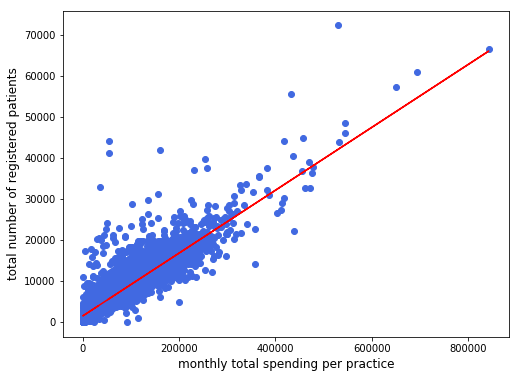

In [161]:
# Visualize the monthly total spending per registered patients using a scatterplot and provide a trend line

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

x=patient_total_spending.total_actual_cost
y=patient_total_spending.number_of_patients

# plot those data points
ax.scatter(x,y,color='royalblue')

# Fit a polynomial of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error.
fit=np.polyfit(x,y,deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')

# Set title and labels
ax.set_title='Scatter plot: monthly total spending / registered patients'
ax.set_xlabel("monthly total spending per practice",fontsize=12)
ax.set_ylabel("total number of registered patients",fontsize=12)

#### Outlier detection
1) Reaonable extreme values
* It can be observed from the scatter plot that there are data points with extremely large values.
* As explained in part 0.3, they are reasonable data because some practice are of huge size. 
* However, they would cause other data points to squeeze on the figure, which is not suitable for presentation.
* Therefore, we need to modify the max-value of x and y-axis, so that the outliers are not shown.
* They should not be excluded from the initial dataset

2) Unreasonalbe extreme values - Outliers
* It can also be observed from the scatter plot that there are data points far away from the trend line.
* They would to to some extent affect the performance of the trend line fitted, because of their unreasonable extreme leverage.
* Also, as explained in part 0.3, they would largely affect the mean values when calculating relative costs per patient.
* Therefore, the outliers should be excluded from the initial dataset. In consideration of efficiency, they are only manipulated in part 4.2.

(0, 24766.0)

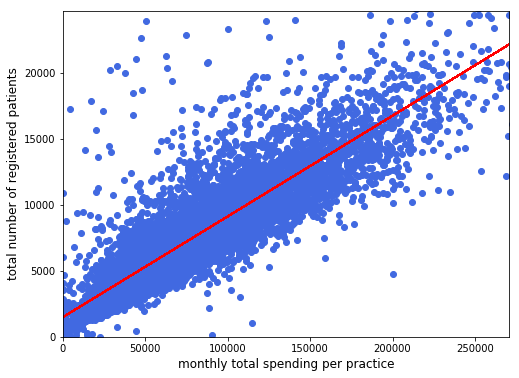

In [258]:
# Visualize the monthly total spending per registered patients using a scatterplot and provide a trend line, do not show extreme values in x and y-axis

# Plot those data points
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

x=cost_per_patient.total_actual_cost
y=cost_per_patient.number_of_patients

ax.scatter(x,y,color='royalblue')

fit=np.polyfit(x,y,deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')

ax.set_title='Scatter plot: monthly total spending / registered patients'
ax.set_xlabel("monthly total spending per practice",fontsize=12)
ax.set_ylabel("total number of registered patients",fontsize=12)

# Modify the max-value of x and y-axis
max_x = floor(cost_per_patient.total_actual_cost.quantile(.99))
max_y = floor(cost_per_patient.number_of_patients.quantile(.99))
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

In [259]:
# Print the regression model of the dataset
beta = str(round((1/fit[0]),3))
alpha = str(round((-fit[1]/fit[0]),3))
'monthly total spending per practice = ' + beta + ' * total number of registered patients ' + alpha

'monthly total spending per practice = 13.068 * total number of registered patients -19413.28'

* Q4.1 It can be observed from the scatter plot that total number of patients and total spending are positively associated across all GP practices. The regression model is:
    
        monthly total spending per practice = 13.068 * total number of registered patients -19413.28

  For every one patient registered, the total spending increase by 13.068 pounds.

#### Outlier manipulation

1) To exclude outliers, first calculate the relative costs per patient of each practice.

2) Exclude outliers according to the rules of generating a box plot.

3) Visualize the result of excluding outliers with box plot.

In [261]:
# Calculate the relative costs per patient of each practice
cost_per_patient = patient_total_spending
cost_per_patient['cost_per_patient'] = cost_per_patient['total_actual_cost'] / cost_per_patient['number_of_patients'] 
cost_per_patient.head()

,practice,total_actual_cost,code,number_of_patients,cost_per_patient
0,A81001,52194.63,A81001,4086,12.774016
1,A81002,268607.26,A81002,19906,13.493784
2,A81004,139115.40,A81004,10165,13.685726
3,A81005,102914.06,A81005,8016,12.838580
4,A81006,183226.79,A81006,14497,12.638945


In [264]:
# Calculate the quantiles
[Q1,Q3]=cost_per_patient.cost_per_patient.quantile([0.25,0.75])
# Calculate interquartile range 
IQR = Q3 - Q1
# Exclude outliers
cost_per_patient_cleaned = cost_per_patient[(cost_per_patient.cost_per_patient>=(Q1-1.5*IQR))&(cost_per_patient.cost_per_patient<=(Q3+1.5*IQR))]
cost_per_patient_cleaned.head()

,practice,total_actual_cost,code,number_of_patients,cost_per_patient
0,A81001,52194.63,A81001,4086,12.774016
1,A81002,268607.26,A81002,19906,13.493784
2,A81004,139115.40,A81004,10165,13.685726
3,A81005,102914.06,A81005,8016,12.838580
4,A81006,183226.79,A81006,14497,12.638945


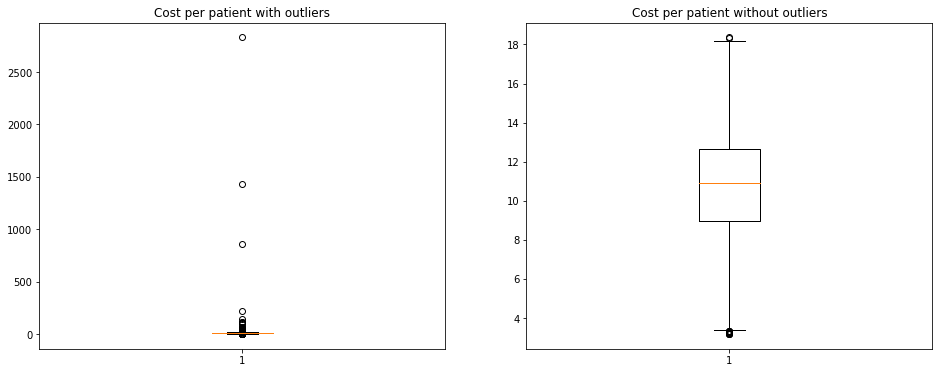

In [265]:
# Visualize the result of excluding outliers with box plot

fig = plt.figure(figsize=(16,6))

# Plot a box plot of cost per patient with outliers
fig1 = plt.subplot(121)
x1 = cost_per_patient.cost_per_patient.values
plt.boxplot(x1)
plt.title('Cost per patient with outliers')

# Plot a box plot of cost per patient without outliers
fig2 = plt.subplot(122)
x2 = cost_per_patient_cleaned.cost_per_patient
plt.boxplot(x2)
plt.title('Cost per patient without outliers')

plt.show()
plt.close()

### 4.2 Generate a histogram for relative spending for all practices and fit a Gaussian(normal) curve

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]


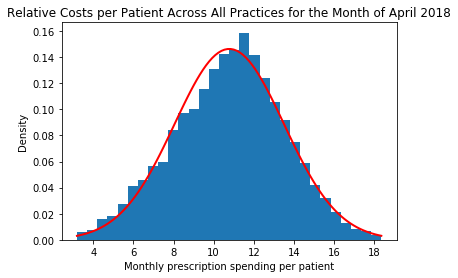

In [266]:
# Generate a histogram for relative spending for all practices 
x = cost_per_patient_cleaned.cost_per_patient.values
plt.hist(x, bins=30, normed=True)

# Fit a Gaussian(normal) curve
import matplotlib.mlab as mlab

min_x=min(x)
max_x=max(x)
mu = np.mean(x)
sigma = np.std(x)
x2=np.linspace(min_x, max_x,100)
plt.plot(x2, mlab.normpdf(x2,mu,sigma), 'r', linewidth=2)

plt.xlabel("Monthly prescription spending per patient")
plt.ylabel("Density")
plt.title("Relative Costs per Patient Across All Practices for the Month of April 2018")

plt.show()
plt.close()

In [267]:
# Print mean of relative cost per patient
round(mu,2)

10.78

* Q1.5 It can be observed from the histogram and Gaussian curve that relative cost per patient is only slightly negative skewed. Patients on average spend 10.78 pounds in practices for the month of April 2018.

# Assignment B - WHO Mortality Database

## Overview of Assignment B

1) Assignment B uses data from WHO Mortality Database to analyse causes of death in different countries.

2) There are mainly 3 files used in this session and are read into 3 DataFrames named 'country_code', 'population' and 'mortality':

* country_codes: country codes and names
* population: population (at all ages and at each age group) and live births
* mortality: cause of death according to ICD-10 (either with 3 characters or 4 characters ICD 10 codes) and number of deaths (at all ages and at each age group)

3) There are 4 criteria used to identify the subsets of interest: Country, Casue of death, Year and Age group, to address 4 kinds of problem: Population and number of death, distribution of deaths by age groups, top casuses of death, top age groups dying, as well as comparing two countries with a combination of analysis above.

|Question|Country|Cause of Deaths|Year|Age Group|Problem|
|--|--|--|--|--|--|
|1|Iceland / Italy / New Zealand|All causes|2010|All ages|Population & Total number of deaths|
|2|Italy|All causes|All years|Age groups|Distribution of deaths by age groups|
|3|Italy|Neoplasm|All years|All ages|Top causes of death|
|4|Australia|Neoplasm|2010|Age groups|Top age groups dying|
|5|Italy & Australia|Neoplasm|2010|All ages / Age groups|Comparison|


* The matching variable 'Country' is identified by country code, looked up in 'country_code'.
* Cause of deaths is identified by 3 characters ICD 10 codes (coverting 4 characters codes to 3 characters ones) according to WHO web site 'https://icd.who.int/browse10/2016/en#/C34.9'
* Pop1/Deaths1 refers to all ages, while Pop2-26/Deaths2-26 refers to each age group, according to the documentation of WHO mortality database

4) Data preparation include reading in files, analysing missing values and outliers, as well as summarizing data. These process are conducted both at the beginning and later in in the assignment. Data prepareation enables reliable results based on quality dataset.

5) The results of analysis are interpreted using a combination of narrative, tables, figures, and descriptive statistics

## 0. Data preparation

### 0.1 Read in files to pandas dataframes

In [271]:
# Read in "Country codes" look up file which contains identifier codes

# Create custom column names and read in the country codes data file using the column names as the header.
filename = path + 'country_codes.csv'
cols = ['Country', 'Name']
country_codes = pd.read_csv(filename, sep=',',header=None, names=cols,index_col=False, skiprows=1).rename(columns=lambda x: x.strip())

# Explore the data using built-in methods
country_codes.head()

,Country,Name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso


In [272]:
# Read in "Population and live births" file which contains information on the population of each country

filename = path + 'pop.csv'
cols = ['Country', 'Admin1', 'SubDiv', 'Year', 'Sex', 'Frmat', 'Pop1', 'Pop2', 'Pop3', 'Pop4', 'Pop5', 'Pop6', 'Pop7', 'Pop8', 'Pop9', 'Pop10', 'Pop11', 'Pop12', 'Pop13', 'Pop14', 'Pop15', 'Pop16', 'Pop17', 'Pop18', 'Pop19', 'Pop20', 'Pop21', 'Pop22', 'Pop23', 'Pop24', 'Pop25', 'Pop26', 'Lb']
population = pd.read_csv(filename, sep=',',header=None, names=cols,index_col=False, skiprows=1).rename(columns=lambda x: x.strip())

population.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


In [273]:
# Read in "Morticd10" files  which report the cause of death using the 10th revision of the International Classification of Diseases (ICD-10)
filename = path + 'Morticd10_part1.csv'
cols = ['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Cause', 'Sex', 'Frmat', 'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1', 'IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4']

# According to the documentation, the fields “Admin1”, “Subdiv”, “List”, “Cause”, “Frmat” and “IM_Frmat” should be treated as characters.  The other fields can be treated as numerical variables. 
mortality_1 = pd.read_csv(filename, sep=',',header=None, names=cols,index_col=False, skiprows=1, dtype = {'Admin1': object, 'SubDiv': object, 'List': object, 'Cause': object, 'Frmat': object, 'IM_Frmat': object}).rename(columns=lambda x: x.strip())

mortality_1.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,07,08,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,07,08,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,07,08,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,07,08,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,07,08,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [274]:
filename = path + 'Morticd10_part2.csv'
mortality_2 = pd.read_csv(filename, sep=',',header=None, names=cols,index_col=False, skiprows=1, dtype = {'Admin1': object, 'SubDiv': object, 'List': object, 'Cause': object, 'Frmat': object, 'IM_Frmat': object}).rename(columns=lambda x: x.strip())
mortality_2.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2005,101,1000,1,07,08,386,...,136.0,NaN,NaN,NaN,NaN,0.0,10.0,NaN,NaN,NaN
1,1400,NaN,NaN,2005,101,1000,2,07,08,287,...,163.0,NaN,NaN,NaN,NaN,0.0,6.0,NaN,NaN,NaN
2,1400,NaN,NaN,2005,101,1001,1,07,08,29,...,13.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2005,101,1001,2,07,08,21,...,16.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2005,101,1002,1,07,08,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [275]:
# Merge the two mortality dataframes into one dataframe
mortality = pd.concat([mortality_1, mortality_2])

mortality.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,07,08,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,07,08,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,07,08,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,07,08,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,07,08,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


### 0.2 Check out the missing values

In [279]:
# The missing value are automatically coded as NaN. Count non-NA/null values of each object
country_codes.count(),country_codes.shape

(Country    227
 Name       227
 dtype: int64, (227, 2))

In [281]:
population.count(),population.shape

(Country    9349
 Admin1       82
 SubDiv      138
 Year       9349
 Sex        9349
 Frmat      9349
 Pop1       9349
 Pop2       9213
 Pop3       9213
 Pop4       5152
 Pop5       5152
 Pop6       5152
 Pop7       9213
 Pop8       9195
 Pop9       9213
 Pop10      9195
 Pop11      9213
 Pop12      9195
 Pop13      9213
 Pop14      9195
 Pop15      9213
 Pop16      9195
 Pop17      9213
 Pop18      9195
 Pop19      9213
 Pop20      9151
 Pop21      9057
 Pop22      8197
 Pop23      8197
 Pop24      1148
 Pop25      1148
 Pop26      9195
 Lb         9125
 dtype: int64, (9349, 33))

In [282]:
mortality.count(), mortality.shape

(Country       3587860
 Admin1          84173
 SubDiv           2707
 Year          3587860
 List          3587860
 Cause         3587860
 Sex           3587860
 Frmat         3587860
 IM_Frmat      3587860
 Deaths1       3587860
 Deaths2       3585618
 Deaths3       3585618
 Deaths4       3420612
 Deaths5       3420612
 Deaths6       3420612
 Deaths7       3585618
 Deaths8       3582633
 Deaths9       3585618
 Deaths10      3582633
 Deaths11      3585618
 Deaths12      3582633
 Deaths13      3585618
 Deaths14      3582633
 Deaths15      3585618
 Deaths16      3582633
 Deaths17      3585618
 Deaths18      3582633
 Deaths19      3585618
 Deaths20      3582309
 Deaths21      3585294
 Deaths22      3574442
 Deaths23      3574442
 Deaths24      3109293
 Deaths25      3109293
 Deaths26      3585618
 IM_Deaths1    3585617
 IM_Deaths2    2779471
 IM_Deaths3    2868691
 IM_Deaths4    2868691
 dtype: int64, (3587860, 39))

#### Missing value analysis:

* There is no missing value in  column 'Country' of all the three dataframes, which represents the unique country code of each country. Therefore, country code is a matching variable of high quality for linking these dataframes.
* There is no missing value in columns 'Pop1' and 'Deaths1'. Therefore, the calculation of population and number of deaths across all ages wouldn't be affected by missing values.
* There are many missing values in columns 'Pop2' to 'Pop26'. Therefore, problem of missing values should be taken into account while analysing population of each age group.
* There are a few missing values in columns 'Deaths2' to 'Deaths26', it could be because that there is no deaths for certain disease in that country, year and age group, which are acceptable.
* Missing value in columns 'Admin1'and 'Subdiv' mean data reported refer to the country, which are reasonable.

# 1. What was the population and the total number of deaths (from all causes, all ages) in 2010 for: 1) Iceland 2) Italy 3) New Zealand


In [288]:
# Look up the country code for Iceland
country_name='Iceland'
country_codes_Iceland=country_codes['Country'][country_codes.Name==country_name].values[0]
country_codes_Iceland

4160

In [289]:
# Calculate the population in 2010 for Iceland

# The subset of population data is matched by the country code and the year of interest
population_Iceland_2010=population[(population.Country==country_codes_Iceland)&(population.Year==2010)]
# Number of population (from each gender) is contained in the column 'Pop1'(Population at all ages). Sum up the values to get whole population. 
total_population_Iceland_2010=sum(population_Iceland_2010.Pop1)
total_population_Iceland_2010

318041.0

In [290]:
# Calculate the total number of deaths (from all causes, all ages) in 2010 for Iceland

# The subset of mortality data is matched by the country code and the year of interest
mortality_Iceland_2010=mortality[(mortality.Country==country_codes_Iceland)&(mortality.Year==2010)]
# Sum up the values of column 'Deaths1' wich contains number of death at all ages for each cause and gender
total_mortality_Iceland_2010=sum(mortality_Iceland_2010.Deaths1)
total_mortality_Iceland_2010

4038L

In [291]:
# Look up the country code for Italy
country_name='Italy'
country_codes_Italy=country_codes['Country'][country_codes.Name==country_name].values[0]
country_codes_Italy

4180

In [292]:
# Calculate the population in 2010 for Italy
population_Italy_2010=population[(population.Country==country_codes_Italy)&(population.Year==2010)]
total_population_Italy_2010=sum(population_Italy_2010.Pop1)
total_population_Italy_2010

60483386.0

In [293]:
# Calculate the total number of deaths (from all causes, all ages) in 2010 for Italy
mortality_Italy_2010=mortality[(mortality.Country==country_codes_Italy)&(mortality.Year==2010)]
total_mortality_Italy_2010=sum(mortality_Italy_2010.Deaths1)
total_mortality_Italy_2010

1169230L

In [294]:
# Look up the country code for Iceland
country_name='New Zealand'
country_codes_New_Zealand=country_codes['Country'][country_codes.Name==country_name].values[0]
country_codes_New_Zealand

5150

In [295]:
# Calculate the population in 2010 for Iceland
population_New_Zealand_2010=population[(population.Country==country_codes_New_Zealand)&(population.Year==2010)]
total_population_New_Zealand_2010=sum(population_New_Zealand_2010.Pop1)
total_population_New_Zealand_2010

4367360.0

In [296]:
# Calculate the total number of deaths (from all causes, all ages) in 2010 for Iceland
mortality_New_Zealand_2010=mortality[(mortality.Country==country_codes_New_Zealand)&(mortality.Year==2010)]
total_mortality_New_Zealand_2010=sum(mortality_New_Zealand_2010.Deaths1)
total_mortality_New_Zealand_2010

57298L

In [297]:
# Generate a table with the name of country, population and total number of deaths
population_mortality = pd.DataFrame(
    {'Country':['Iceland', 'Italy', 'New Zealand'],
     'Population':[total_population_Iceland_2010, total_population_Italy_2010, total_population_New_Zealand_2010],
     'Total Number of Deaths':[total_mortality_Iceland_2010, total_mortality_Italy_2010, total_mortality_New_Zealand_2010]})
population_mortality

,Country,Population,Total Number of Deaths
0,Iceland,318041.0,4038
1,Italy,60483386.0,1169230
2,New Zealand,4367360.0,57298


* Q1 The population and the total number of deaths (from all causes, all ages) in 2010 for: 1) Iceland 2) Italy 3) New Zealand are:

|Country 	|Population 	|Total Number of Deaths|
|--|--|--|
|Iceland 	|318041.0 	|4038|
|Italy 	|60483386.0 	|1169230|
|New Zealand 	|4367360.0 	|57298|

# 2. What was the distribution of deaths (all causes, all years) by age group in Italy?


In [298]:
# Calculate total number of deaths (all causes, all years) of each age group in Italy

# The subset of mortality data (all causes, all years) is matched by the country code of Italy
# Select columns 'Deaths2' to 'Deaths26' which contains number of deaths of each age group for each cause and gender
mortality_Italy = mortality[mortality.Country==country_codes_Italy][['Deaths2', 'Deaths3', 'Deaths4', 'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24', 'Deaths25', 'Deaths26']]
mortality_Italy.head()

,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,...,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26
1053321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1053322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
1053323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0
1053324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1053325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [303]:
# Sum up the values of each column to get total number of deaths of each age group
mortality_Italy_age_group=pd.DataFrame(mortality_Italy.apply(lambda x: x.sum())).copy(deep=True)

# Reset the index
mortality_Italy_age_group.reset_index(inplace=True)
# Rename the columns
mortality_Italy_age_group.columns=['Age_Group','Deaths']

mortality_Italy_age_group.head()

,Age_Group,Deaths
0,Deaths2,48752.0
1,Deaths3,3262.0
2,Deaths4,2168.0
3,Deaths5,1826.0
4,Deaths6,1628.0


In [305]:
# Look up in documentation which age group each row represents
mortality_Italy_age_group['Age_Group']=['0', '1', '2', '3', '4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+', 'unspecified']
mortality_Italy_age_group.head()

,Age_Group,Deaths
0,0,48752.0
1,1,3262.0
2,2,2168.0
3,3,1826.0
4,4,1628.0


Text(0,0.5,'Deaths')

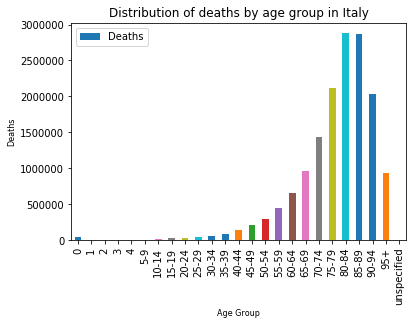

In [306]:
# Visualise the results using a bar chart
ax=mortality_Italy_age_group[['Age_Group','Deaths']].plot(kind='bar', x='Age_Group', y='Deaths', title='Distribution of deaths by age group in Italy', figsize=(6,4),legend=True, fontsize=10)

ax.set_xlabel("Age Group",fontsize=8)

ax.set_ylabel("Deaths",fontsize=8)

* Q2 It can be observed from the bar chart that total number of death for each age group increases rapidly with increase in age, and reaches the peak around 2,900,000 in age group 80-84. The decrease of number of death in older age groups may due to decrease of populaiton of that age group. 
  We can refer to detailed numbers of death in the table (dataframe) printed above.

# 3. What were the top five causes of death (top five ICD-10 terms) in Italy across all years for the Neoplasm ICD10-category (C00-D48)?


#### Identify the regex-patterns of ICD-10 codes of Neoplasm
* According to the documentation, the ICD-10 codes can have either 3 or 4 digits. A cause with 4 digits (e.g.C349) is a subtype of the cause defined by the former 3 digits (i.e.C34)

* The most important disadvantage of ICD-10 is its fixed depth (a lot of classification go to the 10th term (e.g.C34.9) which is unspecified). It can also be computed in this dataset that the most prevalent subtypes of Neoplasm are those defined by 4-digit ICD-10 codes ending up with 9 (e.g.C349), which is 'unspecified'.

* The use of ‘unspecified’ and mixed use of 3- and 4- digit codes make it unclear to discover the real prevalence of each cause. Therefore, it is necessary to convert 4-digit codes into 3-digit ones, which together represent the sum of all deaths due to the base type of disease.

In [307]:
# The regex-patterns refer to ICD-10 codes C00-D48, including both 3- and 4- digit codes, to identify all the Neoplasm categories

neoplasm_regex='C\d{2}|D[0-3]\d|D4[0-8]'

#### Discover the top five causes of death for Neoplasm

In [308]:
# The subset of mortality data is matched by the country code and the ICD-10 code
mortality_Italy_neoplasm=mortality[(mortality.Country==country_codes_Italy)&(mortality.Cause.str.match(neoplasm_regex))]
mortality_Italy_neoplasm.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
1053596,4180,NaN,NaN,2003,104,C000,1,00,01,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1053597,4180,NaN,NaN,2003,104,C000,2,00,01,7,...,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
1053598,4180,NaN,NaN,2003,104,C001,1,00,01,21,...,3.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1053599,4180,NaN,NaN,2003,104,C001,2,00,01,5,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1053600,4180,NaN,NaN,2003,104,C009,1,00,01,24,...,3.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
# Use deep copy in case the initial dataset would be changed when generating a new column
# To save memory, only select columns 'Cause' and 'Deaths1', which contain cause of death and number of death at all ages
mortality_Italy_neoplasm_3digits=mortality_Italy_neoplasm[['Cause','Deaths1']].copy(deep=True)
mortality_Italy_neoplasm_3digits.head()

,Cause,Deaths1
1053596,C000,2
1053597,C000,7
1053598,C001,21
1053599,C001,5
1053600,C009,24


In [310]:
# Convert 4-digit codes into 3-digit ones and store the new codes in column 'Cause_3digits'
mortality_Italy_neoplasm_3digits['Cause_3digits']=mortality_Italy_neoplasm_3digits['Cause'].apply(lambda x: str(x)[0:3])
mortality_Italy_neoplasm_3digits.head()

,Cause,Deaths1,Cause_3digits
1053596,C000,2,C00
1053597,C000,7,C00
1053598,C001,21,C00
1053599,C001,5,C00
1053600,C009,24,C00


In [311]:
# Sum up number of death of each age group grouping by the 3-digit ICD-10 codes, to get total number of deaths due to each base type of disease.
total_mortality_Italy_neoplasm = pd.DataFrame(mortality_Italy_neoplasm_3digits.groupby(mortality_Italy_neoplasm_3digits.Cause_3digits).apply(lambda subf: subf['Deaths1'].sum()))
# Rename the column
total_mortality_Italy_neoplasm.columns=['Total_Deaths']
# Reset the index
total_mortality_Italy_neoplasm.reset_index(inplace=True)

total_mortality_Italy_neoplasm.head()

,Cause_3digits,Total_Deaths
0,C00,783
1,C01,1359
2,C02,5989
3,C03,329
4,C04,585


In [359]:
# Sort the dataset by column 'Total_Deaths' to get the top five causes of death for Neoplasm
total_mortality_Italy_neoplasm_sorted=total_mortality_Italy_neoplasm.sort_values('Total_Deaths', axis=0, ascending=False, kind='quicksort', na_position='last')    
# Select the top five causes of death for Neoplasm
top_5_causes_Italy=total_mortality_Italy_neoplasm_sorted.head(5).copy(deep=True)
# Reset the index
top_5_causes_Italy=top_5_causes_Italy.reset_index(drop=True)

top_5_causes_Italy

,Cause_3digits,Total_Deaths
0,C34,430069
1,C18,182802
2,C50,156002
3,C16,132676
4,C25,132125


In [360]:
# Look up the disease each ICD-10 code refers to on  'https://icd.who.int/browse10/2016/en'
# Rename the causes for presentation
top_5_causes_Italy['Cause_3digits']=['Malignant neoplasm of bronchus and lung', 'Malignant neoplasm of colon', 'Malignant neoplasm of breast', 'Malignant neoplasm of stomach', 'Malignant neoplasm of pancreas']

top_5_causes_Italy

,Cause_3digits,Total_Deaths
0,Malignant neoplasm of bronchus and lung,430069
1,Malignant neoplasm of colon,182802
2,Malignant neoplasm of breast,156002
3,Malignant neoplasm of stomach,132676
4,Malignant neoplasm of pancreas,132125


#### Calculate the proportion of overall deaths

In [361]:
# Calculate total number of deaths due to Neoplasm
all_causes_Italy=total_mortality_Italy_neoplasm.Total_Deaths.sum()
all_causes_Italy

2248661

In [362]:
# Calculate number of death dut to Neoplasm other than the top five causes
other_causes_Italy=all_causes_Italy-top_5_causes_Italy.Total_Deaths.sum()
other_causes_Italy

1214987

In [363]:
# Add the 6th row which refers to remainder of causes
top_5_causes_Italy.loc[5]={'Cause_3digits':'Remainder of malignant neoplasms','Total_Deaths':other_causes_Italy}
top_5_causes_Italy

,Cause_3digits,Total_Deaths
0,Malignant neoplasm of bronchus and lung,430069
1,Malignant neoplasm of colon,182802
2,Malignant neoplasm of breast,156002
3,Malignant neoplasm of stomach,132676
4,Malignant neoplasm of pancreas,132125
5,Remainder of malignant neoplasms,1214987


In [364]:
# Calculate the proportion of overall deaths and generate a new column to store the result
top_5_causes_Italy['Proportion']=top_5_causes_Italy['Total_Deaths'] / all_causes_Italy
# Round off the value to the nearest 3 decimal places.
top_5_causes_Italy['Proportion'] = top_5_causes_Italy['Proportion'].apply(lambda x: round(x,3))
top_5_causes_Italy

,Cause_3digits,Total_Deaths,Proportion
0,Malignant neoplasm of bronchus and lung,430069,0.191
1,Malignant neoplasm of colon,182802,0.081
2,Malignant neoplasm of breast,156002,0.069
3,Malignant neoplasm of stomach,132676,0.059
4,Malignant neoplasm of pancreas,132125,0.059
5,Remainder of malignant neoplasms,1214987,0.540


### 3.1 Generate a table with the cause of death, the number of deaths, and the proportion of overall deaths.

In [365]:
# Rename the columns for presentation
top_5_causes_Italy.columns=['Cause_of_deaths', 'Number_of_deaths', 'Proportion_of_overall_deaths']
top_5_causes_Italy

,Cause_of_deaths,Number_of_deaths,Proportion_of_overall_deaths
0,Malignant neoplasm of bronchus and lung,430069,0.191
1,Malignant neoplasm of colon,182802,0.081
2,Malignant neoplasm of breast,156002,0.069
3,Malignant neoplasm of stomach,132676,0.059
4,Malignant neoplasm of pancreas,132125,0.059
5,Remainder of malignant neoplasms,1214987,0.540


* Q3.1 The top five causes of death in Italy across all years for Neoplasms are: Malignant neoplasm of bronchus and lung, colon, breast, stomach and pancreas. 

    They make up almost half of deaths for Neoplasm. Malignant neoplasm of bronchus and lung alone accounts for 19% of death, which is relatively high.

### 3.2 Generate a pie chart to visualize the proportion of deaths

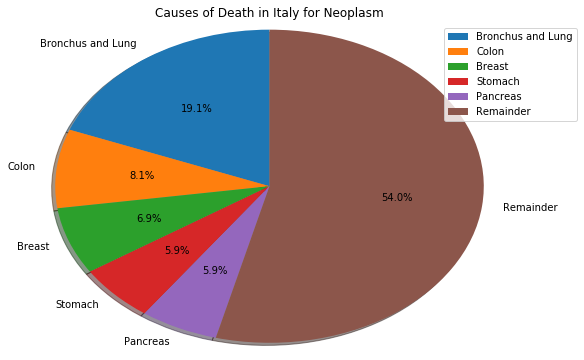

In [366]:
# Define labels
cause_of_death_Italy=['Bronchus and Lung', 'Colon', 'Breast', 'Stomach', 'Pancreas', 'Remainder']
# Portion covered by each label
number_of_deaths_Italy=top_5_causes_Italy.Number_of_deaths

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(number_of_deaths_Italy, labels = cause_of_death_Italy, startangle=90, shadow = True, radius = 1.2, autopct = '%1.1f%%')
# Plot a lenged on the upper right of the pie chart
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Causes of Death in Italy for Neoplasm')

plt.show()
plt.close()

* Q3.2 The pie chart visualizes the causes of death in Italy across all years for Neoplasms, with the top 5 causes highlightened. It can easily be observed, as mentioned before, that the top 5 causes are of high prevalence, especially the malignant neoplasm of bronchus.

# 4. Are there differences by age group for deaths from Neoplasms (C00-D48) in Australia for 2010?

### 4.1 Identify the top five age groups in Australia dying with a Neoplasms cause of death.

#### Identify the dataset of age groups in Australia dying with a Neoplasms in 2010

In [367]:
# Look up the country code for Australia
country_name='Australia'
country_codes_Australia=country_codes['Country'][country_codes.Name==country_name].values[0]
country_codes_Australia

5020

In [368]:
# The subset of mortality data is matched by the country code, year of interest and ICD-10 code
# Select columns 'Deaths2' to 'Deaths26' which contains number of deaths of each age group for each cause and gender
mortality_Australia_2010_neoplasm=mortality[(mortality.Country==country_codes_Australia)&(mortality.Year==2010)&(mortality.Cause.str.match(neoplasm_regex))][['Deaths2', 'Deaths3', 'Deaths4', 'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24', 'Deaths25', 'Deaths26']]
mortality_Australia_2010_neoplasm.head()

,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,...,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26
2144494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2144495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2144496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2144497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0
2144498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,5.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0


#### Detect missing values

In [369]:
# Detect missing values
mortality_Australia_2010_neoplasm.count()

Deaths2     562
Deaths3     562
Deaths4     562
Deaths5     562
Deaths6     562
Deaths7     562
Deaths8     562
Deaths9     562
Deaths10    562
Deaths11    562
Deaths12    562
Deaths13    562
Deaths14    562
Deaths15    562
Deaths16    562
Deaths17    562
Deaths18    562
Deaths19    562
Deaths20    562
Deaths21    562
Deaths22    562
Deaths23    562
Deaths24    562
Deaths25    562
Deaths26    562
dtype: int64

There is no missing value in the dataset of interest.

In [370]:
# Sum up the values of each column to get total number of deaths of each age group
mortality_Australia_2010_neoplasm_age_group=pd.DataFrame(mortality_Australia_2010_neoplasm.apply(lambda x: x.sum()))
mortality_Australia_2010_neoplasm_age_group.head()

# Reset the index
mortality_Australia_2010_neoplasm_age_group.reset_index(inplace=True)
# Rename the columns
mortality_Australia_2010_neoplasm_age_group.columns=['Age_Group','Deaths']

mortality_Australia_2010_neoplasm_age_group.head()

,Age_Group,Deaths
0,Deaths2,11.0
1,Deaths3,7.0
2,Deaths4,11.0
3,Deaths5,7.0
4,Deaths6,8.0


In [371]:
# Sort the dataset by column 'Deaths' to get the top five age groups dying with a Neoplasms cause of death
mortality_Australia_2010_neoplasm_age_group_sorted=mortality_Australia_2010_neoplasm_age_group.sort_values('Deaths', axis=0, ascending=False, kind='quicksort', na_position='last')    
top_5_age_groups_Australia_2010=mortality_Australia_2010_neoplasm_age_group_sorted.head(5).copy(deep=True)
# Reset the index
top_5_age_groups_Australia_2010=top_5_age_groups_Australia_2010.reset_index(drop=True)

top_5_age_groups_Australia_2010

,Age_Group,Deaths
0,Deaths22,7167.0
1,Deaths21,6291.0
2,Deaths20,5713.0
3,Deaths23,5520.0
4,Deaths19,4768.0


In [372]:
# Look up in documentation which age group each row represents
top_5_age_groups_Australia_2010['Age_Group']=['80-84', '75-79', '70-74', '85-89', '65-69']
top_5_age_groups_Australia_2010

,Age_Group,Deaths
0,80-84,7167.0
1,75-79,6291.0
2,70-74,5713.0
3,85-89,5520.0
4,65-69,4768.0


* Q4.1 The top five age groups in Australia dying with a Neoplasms cause of death in 2010 are: age groups 80-84, 75-79, 70-74, 85-89 and 65-69, which indicates that old people in general are in higher risk of deaths due to Neoplasms.

## 5. Compare and contrast the frequency of deaths by Neoplasms in Italy and Australia in 2010.

### 5.1 Combine information on the population and deaths to calculate the frequency of deaths by Neoplasms in Italy and Australia in 2010

#### 5.1.1.1 Calculate the population in 2010 for Italy

In [373]:
# The population in 2010 for Italy
total_population_Italy_2010

60483386.0

#### 5.1.1.2 Calculate the total number of death caused by Neoplasms in 2010 for Italy

In [374]:
# The subset of mortality data is matched by the country code , year of interest and ICD-10 code
mortality_Italy_2010_neoplasm=mortality[(mortality.Country==country_codes_Italy)&(mortality.Year==2010)&(mortality.Cause.str.match(neoplasm_regex))]
mortality_Italy_2010_neoplasm.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
1577587,4180,NaN,NaN,2010,104,C000,1,00,01,3,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1577588,4180,NaN,NaN,2010,104,C000,2,00,01,4,...,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1577589,4180,NaN,NaN,2010,104,C001,1,00,01,17,...,3.0,6.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1577590,4180,NaN,NaN,2010,104,C001,2,00,01,10,...,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1577591,4180,NaN,NaN,2010,104,C006,1,00,01,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [375]:
# Use deep copy in case the initial dataset would be changed when generating a new column
# To save memory, only select columns 'Cause' and 'Deaths1', which contain cause of death and number of death at all ages
mortality_Italy_2010_neoplasm_3digits=mortality_Italy_2010_neoplasm[['Cause','Deaths1']].copy(deep=True)
mortality_Italy_2010_neoplasm_3digits.head()

,Cause,Deaths1
1577587,C000,3
1577588,C000,4
1577589,C001,17
1577590,C001,10
1577591,C006,1


In [376]:
# Convert 4-digit codes into 3-digit ones and store the new codes in column 'Cause_3digits'
mortality_Italy_2010_neoplasm_3digits['Cause_3digits']=mortality_Italy_2010_neoplasm_3digits['Cause'].apply(lambda x: str(x)[0:3])
mortality_Italy_2010_neoplasm_3digits.head()
# Sum up number of death of each age group grouping by the 3-digit ICD-10 codes, to get total number of deaths due to each base type of disease.
total_mortality_Italy_2010_neoplasm = pd.DataFrame(mortality_Italy_2010_neoplasm_3digits.groupby(mortality_Italy_2010_neoplasm_3digits.Cause_3digits).apply(lambda subf: subf['Deaths1'].sum()))
# Rename the column
total_mortality_Italy_2010_neoplasm.columns=['Total_Deaths']
# Reset the index
total_mortality_Italy_2010_neoplasm.reset_index(inplace=True)

total_mortality_Italy_2010_neoplasm.head()

,Cause_3digits,Total_Deaths
0,C00,66
1,C01,95
2,C02,461
3,C03,32
4,C04,43


In [377]:
# Sort the dataset by column 'Total_Deaths' to get the top five causes of death for Neoplasm
total_mortality_Italy_2010_neoplasm_sorted=total_mortality_Italy_2010_neoplasm.sort_values('Total_Deaths', axis=0, ascending=False, kind='quicksort', na_position='last')    
top_5_causes_Italy_2010=total_mortality_Italy_2010_neoplasm_sorted.head(5).copy(deep=True)
# Resetthe index
top_5_causes_Italy_2010=top_5_causes_Italy_2010.reset_index(drop=True)

top_5_causes_Italy_2010

,Cause_3digits,Total_Deaths
0,C34,33696
1,C18,14547
2,C50,12238
3,C25,10512
4,C16,10075


In [378]:
# Calculate total number of deaths caused by Neoplasm
all_causes_Italy_2010=total_mortality_Italy_2010_neoplasm.Total_Deaths.sum()
other_causes_Italy_2010=all_causes_Italy_2010-top_5_causes_Italy_2010.Total_Deaths.sum()

# The total number of death caused by Neoplasms in 2010 for Italy
all_causes_Italy_2010

175046

#### 5.1.1.3 Calculate the frequency of deaths by Neoplasms in 2010 for Italy

In [379]:
# Calculate prevalence of deaths by Neoplasms in 2010 for Italy (per 1,000,000 people)
prevalence_Italy_2010_neoplasm=all_causes_Italy_2010/total_population_Italy_2010 * 1000000
prevalence_Italy_2010_neoplasm

2894.117072083233

#### 5.1.2.1 Calculate the population in 2010 for Australia

In [380]:
# The population in 2010 for Italy
population_Australia_2010=population[(population.Country==country_codes_Australia)&(population.Year==2010)]
total_population_Australia_2010=sum(population_Australia_2010.Pop1)
total_population_Australia_2010

22297515.0

#### 5.1.2.2 Calculate the total number of death caused by Neoplasms in 2010 for Australia

In [381]:
# The subset of mortality data is matched by the country code , year of interest and ICD-10 code
mortality_Australia_2010_neoplasm=mortality[(mortality.Country==country_codes_Australia)&(mortality.Year==2010)&(mortality.Cause.str.match(neoplasm_regex))]
mortality_Australia_2010_neoplasm.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
2144494,5020,NaN,NaN,2010,104,C001,1,00,01,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2144495,5020,NaN,NaN,2010,104,C001,2,00,01,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2144496,5020,NaN,NaN,2010,104,C009,1,00,01,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2144497,5020,NaN,NaN,2010,104,C009,2,00,01,5,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2144498,5020,NaN,NaN,2010,104,C01,1,00,01,20,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [382]:
# Use deep copy in case the initial dataset would be changed when generating a new column
# To save memory, only select columns 'Cause' and 'Deaths1', which contain cause of death and number of death at all ages
mortality_Australia_2010_neoplasm_3digits=mortality_Australia_2010_neoplasm[['Cause','Deaths1']].copy(deep=True)
mortality_Australia_2010_neoplasm_3digits.head()

,Cause,Deaths1
2144494,C001,2
2144495,C001,2
2144496,C009,2
2144497,C009,5
2144498,C01,20


In [383]:
# Convert 4-digit codes into 3-digit ones and store the new codes in column 'Cause_3digits'
mortality_Australia_2010_neoplasm_3digits['Cause_3digits']=mortality_Australia_2010_neoplasm_3digits['Cause'].apply(lambda x: str(x)[0:3])
mortality_Australia_2010_neoplasm_3digits.head()
# Sum up number of death of each age group grouping by the 3-digit ICD-10 codes, to get total number of deaths due to each base type of disease.
total_mortality_Australia_2010_neoplasm = pd.DataFrame(mortality_Australia_2010_neoplasm_3digits.groupby(mortality_Australia_2010_neoplasm_3digits.Cause_3digits).apply(lambda subf: subf['Deaths1'].sum()))
# Rename the column
total_mortality_Australia_2010_neoplasm.columns=['Total_Deaths']
# Reset the index
total_mortality_Australia_2010_neoplasm.reset_index(inplace=True)

total_mortality_Australia_2010_neoplasm.head()

,Cause_3digits,Total_Deaths
0,C00,11
1,C01,27
2,C02,177
3,C03,14
4,C04,27


In [384]:
# Sort the dataset by column 'Total_Deaths' to get the top five causes of death for Neoplasm
total_mortality_Australia_2010_neoplasm_sorted=total_mortality_Australia_2010_neoplasm.sort_values('Total_Deaths', axis=0, ascending=False, kind='quicksort', na_position='last')    
top_5_causes_Australia_2010=total_mortality_Australia_2010_neoplasm_sorted.head(5).copy(deep=True)
# Resetthe index
top_5_causes_Australia_2010=top_5_causes_Australia_2010.reset_index(drop=True)

top_5_causes_Australia_2010

,Cause_3digits,Total_Deaths
0,C34,8098
1,C61,3236
2,C50,2866
3,C80,2783
4,C25,2434


In [385]:
# Calculate total number of deaths caused by Neoplasm
all_causes_Australia_2010=total_mortality_Australia_2010_neoplasm.Total_Deaths.sum()
other_causes_Australia_2010=all_causes_Australia_2010-top_5_causes_Australia_2010.Total_Deaths.sum()

# The total number of death caused by Neoplasms in 2010 for Australia
all_causes_Australia_2010

43316

#### 5.1.1.3 Calculate the frequency of deaths by Neoplasms in 2010 for Italy

In [386]:
# Calculate prevalence of deaths by Neoplasms in 2010 for Australia (per 1,000,000 people)
prevalence_Australia_2010_neoplasm=all_causes_Australia_2010/total_population_Australia_2010 * 1000000
prevalence_Australia_2010_neoplasm

1942.6380024859272

### Generate a table to compare the frequency of deaths by Neoplasms in Italy and Australia in 2010

In [387]:
# Generate a table to compare the frequency of deaths by Neoplasms in Italy and Australia in 2010
prevalence = pd.DataFrame(
    {'Country':['Italy', 'Australia'],
     'Population':[total_population_Italy_2010, total_population_Australia_2010],
     'Total Number of Deaths':[all_causes_Italy_2010, all_causes_Australia_2010],
     'Prevalence of Death by Neoplams':[prevalence_Italy_2010_neoplasm, prevalence_Australia_2010_neoplasm]})
prevalence

,Country,Population,Prevalence of Death by Neoplams,Total Number of Deaths
0,Italy,60483386.0,2894.117072,175046
1,Australia,22297515.0,1942.638002,43316


* Q5.1 As shown in the table above, people in Italy have higer prevalence of deaths by Neoplasms in 2010. The prevalence in Italy is 2,894 cases per 1,000,000 people, almost 1.5 times as high as that of Australia.

### 5.2 Compare the top five causes of death by Neoplasms in Italy and Australia in 2010 

#### 5.2.1 Calculate the top five causes of death by Neoplasms in Italy in 2010

In [388]:
# Look up the disease each ICD-10 code refers to on  'https://icd.who.int/browse10/2016/en'
# Rename the causes for presentation
top_5_causes_Italy_2010['Cause_3digits']=['Malignant neoplasm of bronchus and lung', 'Malignant neoplasm of colon', 'Malignant neoplasm of breast', 'Malignant neoplasm of pancreas', 'Malignant neoplasm of stomach']

# Add the 6th row which refers to remainder of causes
top_5_causes_Italy_2010.loc[5]={'Cause_3digits':'Remainder of malignant neoplasms','Total_Deaths':other_causes_Italy_2010}
top_5_causes_Italy_2010

,Cause_3digits,Total_Deaths
0,Malignant neoplasm of bronchus and lung,33696
1,Malignant neoplasm of colon,14547
2,Malignant neoplasm of breast,12238
3,Malignant neoplasm of pancreas,10512
4,Malignant neoplasm of stomach,10075
5,Remainder of malignant neoplasms,93978


In [389]:
# Calculate the proportion of overall deaths and generate a new column to store the result
# Round off the value to the nearest 3 decimal places.
top_5_causes_Italy_2010['Proportion']=top_5_causes_Italy_2010['Total_Deaths'] / all_causes_Italy_2010
top_5_causes_Italy_2010['Proportion'] = top_5_causes_Italy_2010['Proportion'].apply(lambda x: round(x,3))
top_5_causes_Italy_2010

,Cause_3digits,Total_Deaths,Proportion
0,Malignant neoplasm of bronchus and lung,33696,0.192
1,Malignant neoplasm of colon,14547,0.083
2,Malignant neoplasm of breast,12238,0.070
3,Malignant neoplasm of pancreas,10512,0.060
4,Malignant neoplasm of stomach,10075,0.058
5,Remainder of malignant neoplasms,93978,0.537


In [390]:
# Rename the columns for presentation
top_5_causes_Italy_2010.columns=['Cause_of_deaths', 'Number_of_deaths', 'Proportion_of_overall_deaths']
top_5_causes_Italy_2010

,Cause_of_deaths,Number_of_deaths,Proportion_of_overall_deaths
0,Malignant neoplasm of bronchus and lung,33696,0.192
1,Malignant neoplasm of colon,14547,0.083
2,Malignant neoplasm of breast,12238,0.070
3,Malignant neoplasm of pancreas,10512,0.060
4,Malignant neoplasm of stomach,10075,0.058
5,Remainder of malignant neoplasms,93978,0.537


5.2.2 Calculate the top five causes of death by Neoplasms in Italy in 2010

In [391]:
# Look up the disease each ICD-10 code refers to on  'https://icd.who.int/browse10/2016/en'
# Rename the causes for presentation
top_5_causes_Australia_2010['Cause_3digits']=['Malignant neoplasm of bronchus and lung', 'Malignant neoplasm of prostate', 'Malignant neoplasm of breast', 'Malignant neoplasm, without specification of site', 'Malignant neoplasm of pancreas']

# Add the 6th row which refers to remainder of causes
top_5_causes_Australia_2010.loc[5]={'Cause_3digits':'Remainder of malignant neoplasms','Total_Deaths':other_causes_Australia_2010}
top_5_causes_Australia_2010

,Cause_3digits,Total_Deaths
0,Malignant neoplasm of bronchus and lung,8098
1,Malignant neoplasm of prostate,3236
2,Malignant neoplasm of breast,2866
3,"Malignant neoplasm, without specification of site",2783
4,Malignant neoplasm of pancreas,2434
5,Remainder of malignant neoplasms,23899


In [392]:
# Calculate the proportion of overall deaths and generate a new column to store the result
# Round off the value to the nearest 3 decimal places.
top_5_causes_Australia_2010['Proportion']=top_5_causes_Australia_2010['Total_Deaths'] / all_causes_Australia_2010
top_5_causes_Australia_2010['Proportion'] = top_5_causes_Australia_2010['Proportion'].apply(lambda x: round(x,3))
top_5_causes_Australia_2010

,Cause_3digits,Total_Deaths,Proportion
0,Malignant neoplasm of bronchus and lung,8098,0.187
1,Malignant neoplasm of prostate,3236,0.075
2,Malignant neoplasm of breast,2866,0.066
3,"Malignant neoplasm, without specification of site",2783,0.064
4,Malignant neoplasm of pancreas,2434,0.056
5,Remainder of malignant neoplasms,23899,0.552


In [393]:
# Rename the columns for presentation
top_5_causes_Australia_2010.columns=['Cause_of_deaths', 'Number_of_deaths', 'Proportion_of_overall_deaths']
top_5_causes_Australia_2010

,Cause_of_deaths,Number_of_deaths,Proportion_of_overall_deaths
0,Malignant neoplasm of bronchus and lung,8098,0.187
1,Malignant neoplasm of prostate,3236,0.075
2,Malignant neoplasm of breast,2866,0.066
3,"Malignant neoplasm, without specification of site",2783,0.064
4,Malignant neoplasm of pancreas,2434,0.056
5,Remainder of malignant neoplasms,23899,0.552


### Generate a pie chart to visualize the proportion of deaths

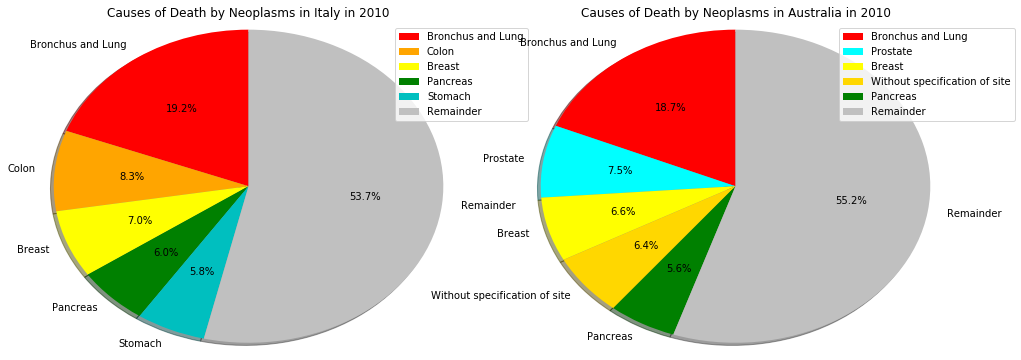

In [394]:
plt.figure(figsize=(16, 6))

# Define labels
cause_of_death_Italy_2010=['Bronchus and Lung', 'Colon', 'Breast', 'Pancreas', 'Stomach', 'Remainder']
cause_of_death_Australia_2010=['Bronchus and Lung', 'Prostate', 'Breast', 'Without specification of site', 'Pancreas', 'Remainder']

# Portion covered by each label
number_of_deaths_Italy_2010=top_5_causes_Italy_2010.Number_of_deaths
number_of_deaths_Australia_2010=top_5_causes_Australia_2010.Number_of_deaths

# Set colors to visualise different types of Neoplasm
colors_Italy=['r', 'orange', 'yellow', 'g', 'c', 'silver']
colors_Australia=['r', 'cyan', 'yellow', 'gold', 'g', 'silver']


# Plot the pie charts
fig1=plt.subplot(121)
plt.pie(number_of_deaths_Italy_2010, labels = cause_of_death_Italy_2010, colors=colors_Italy,startangle=90, shadow = True, radius = 1.2, autopct = '%1.1f%%')
plt.title('Causes of Death by Neoplasms in Italy in 2010')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

fig1=plt.subplot(122)
plt.pie(number_of_deaths_Australia_2010, labels = cause_of_death_Australia_2010, colors=colors_Australia, startangle=90, shadow = True, radius = 1.2, autopct = '%1.1f%%')
plt.title('Causes of Death by Neoplasms in Australia in 2010')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()
plt.close()

* Q5.2 The bar charts compare the top five causes of death by Neoplasms in Italy and Australia in 2010. 
    * Malignant neoplasm of bronchus and lung is the top cause in both countries, accounting for almost 20% of total deaths. 
    * Malignant neoplasm of breast and pancreas are among the top 5 causes in both countries and less proportion of people die from these two diseases in Australia than in Italy.
    * Malignant neoplasm of colon and stomach are among top 5 causes in Italy, while malignant neoplasm of prostate and those without specification of site are among top 5 causes in Australia.

### 5.3 Compare distribution of deaths by age group in Italy and Australia in 2010 for Neoplasms

#### 5.3.1 Distribution of deaths by age group in Italy in 2010 for Neoplasms

In [395]:
# The subset of mortality data is matched by the country code , year of interest and ICD-10 code
# Select columns 'Deaths2' to 'Deaths26' which contains number of deaths of each age group for each cause and gender
mortality_Italy_2010_neoplasm = mortality[(mortality.Country==country_codes_Italy)&(mortality.Year==2010)&(mortality.Cause.str.match(neoplasm_regex))][['Deaths2', 'Deaths3', 'Deaths4', 'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24', 'Deaths25', 'Deaths26']]
mortality_Italy_2010_neoplasm.head()

,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,...,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26
1577587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
1577588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
1577589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.0,6.0,4.0,0.0,1.0,0.0
1577590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0
1577591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [396]:
# Sum up the values of each column to get total number of deaths of each age group
mortality_Italy_2010_neoplasm_age_group=pd.DataFrame(mortality_Italy_2010_neoplasm.apply(lambda x: x.sum())).copy(deep=True)
mortality_Italy_2010_neoplasm_age_group.head()

# Reset the index
mortality_Italy_2010_neoplasm_age_group.reset_index(inplace=True)
# Rename the columns
mortality_Italy_2010_neoplasm_age_group.columns=['Age_Group','Deaths']

mortality_Italy_2010_neoplasm_age_group.head()

,Age_Group,Deaths
0,Deaths2,19.0
1,Deaths3,21.0
2,Deaths4,16.0
3,Deaths5,26.0
4,Deaths6,20.0


In [397]:
# Calculate prevalence of deaths by age group in Italy in 2010 by Neoplasms(per 1,000,000 people)
mortality_Italy_2010_neoplasm_age_group['Prevalence']=mortality_Italy_2010_neoplasm_age_group['Deaths']/total_population_Italy_2010 * 1000000
mortality_Italy_2010_neoplasm_age_group['Prevalence'] = mortality_Italy_2010_neoplasm_age_group['Prevalence'].apply(lambda x: round(x,3))
# Look up in documentation which age group each row represents
mortality_Italy_2010_neoplasm_age_group['Age_Group']=['0', '1', '2', '3', '4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+', 'unspecified']
mortality_Italy_2010_neoplasm_age_group.head()

,Age_Group,Deaths,Prevalence
0,0,19.0,0.314
1,1,21.0,0.347
2,2,16.0,0.265
3,3,26.0,0.430
4,4,20.0,0.331


#### 5.3.2 Distribution of deaths by age group in Australia in 2010 for Neoplasms

In [398]:
# The subset of mortality data is matched by the country code , year of interest and ICD-10 code
# Select columns 'Deaths2' to 'Deaths26' which contains number of deaths of each age group for each cause and gender
mortality_Australia_2010_neoplasm = mortality[(mortality.Country==country_codes_Australia)&(mortality.Year==2010)&(mortality.Cause.str.match(neoplasm_regex))][['Deaths2', 'Deaths3', 'Deaths4', 'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24', 'Deaths25', 'Deaths26']]
mortality_Italy_2010_neoplasm.head()

,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,...,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26
1577587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
1577588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
1577589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.0,6.0,4.0,0.0,1.0,0.0
1577590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0
1577591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [399]:
# Sum up the values of each column to get total number of deaths of each age group
mortality_Australia_2010_neoplasm_age_group=pd.DataFrame(mortality_Australia_2010_neoplasm.apply(lambda x: x.sum())).copy(deep=True)
mortality_Australia_2010_neoplasm_age_group.head()

# Reset the index
mortality_Australia_2010_neoplasm_age_group.reset_index(inplace=True)
# Rename the columns
mortality_Australia_2010_neoplasm_age_group.columns=['Age_Group','Deaths']

mortality_Australia_2010_neoplasm_age_group.head()

,Age_Group,Deaths
0,Deaths2,11.0
1,Deaths3,7.0
2,Deaths4,11.0
3,Deaths5,7.0
4,Deaths6,8.0


In [400]:
# Calculate prevalence of deaths by age group in Italy in 2010 by Neoplasms(per 1,000,000 people)
mortality_Australia_2010_neoplasm_age_group['Prevalence']=mortality_Australia_2010_neoplasm_age_group['Deaths']/total_population_Australia_2010 * 1000000
mortality_Australia_2010_neoplasm_age_group['Prevalence'] = mortality_Australia_2010_neoplasm_age_group['Prevalence'].apply(lambda x: round(x,3))
# Look up in documentation which age group each row represents
mortality_Australia_2010_neoplasm_age_group['Age_Group']=['0', '1', '2', '3', '4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+', 'unspecified']

### Generate a barchart to compare distribution of deaths by age group in Italy and Australia in 2010 for Neoplasms

<Figure size 864x648 with 0 Axes>

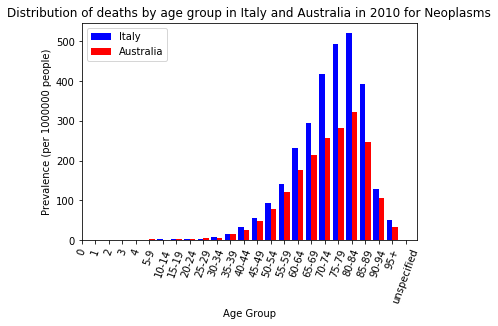

In [403]:
plt.figure(figsize=(12,9))
ax = plt.subplots()

# Define labels and height of each bar
index = np.arange(25)
prevalence_Italy = mortality_Italy_2010_neoplasm_age_group.Prevalence
prevalence_Australia = mortality_Australia_2010_neoplasm_age_group.Prevalence

# Set width of bars
bar_width=0.4
# Plot the bar chart
ax1=plt.bar(index,prevalence_Italy,bar_width,color='b',label='Italy')
ax2=plt.bar(index+bar_width,prevalence_Australia,bar_width,color='r',label='Australia')

plt.xlabel('Age Group')
plt.ylabel('Prevalence (per 1000000 people)')
plt.title('Distribution of deaths by age group in Italy and Australia in 2010 for Neoplasms')
plt.xlim(1,25)
# Set tick labels
plt.xticks(index+bar_width, ())
plt.xticks(index + bar_width/2, ('0', '1', '2', '3', '4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+', 'unspecified'),rotation='70')
plt.legend()

plt.show()

* Q5.3 The histogram visualises the distribution of deaths by age group in Italy and Australia in 2010 for Neoplasms.
    * It can be observed that each age group in Italy in general have higher prevalence of deaths for Neoplams in 2010 the age group in Australia
    * The trend of prevalence against age are similar in two countries. Total prevalence of death for each age group increases rapidly with increase in age, and reaches the peak in age group 80-84. 
    * Refering to interpretation of Question 2, the decrease of prevalence of death in older age groups is not due to decrease of populaiton of that age group because the trend still exist using prevalence instead of number of death